In [1]:
%load_ext autoreload
%autoreload 2
import os

os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from AnalysisTables.trial_intervals import TrialIntervals
from AnalysisTables.decoding_tables import ClusterlessAheadBehindDistance, BadDecodes
from AnalysisTables.valid_decode_times import ClusterlessValidDecodeTimes, ClusterlessValidDecodeParams
from Analysis.utils import (
    filter_opto_data,
    get_running_valid_intervals,
    smooth,
    weighted_quantile,
)
from AnalysisTables.place_fields import TrackCellCoverage
from Style.style_guide import animal_style, interval_style
from ms_opto_stim_protocol import OptoStimProtocol
from Analysis.lfp_analysis import power_spectrum

from spyglass.decoding.v1.clusterless import ClusterlessDecodingV1
from spyglass.common import TaskEpoch, PositionIntervalMap, interval_list_intersect


import numpy as np
import matplotlib.pyplot as plt

from spyglass.common import interval_list_union

[2025-07-29 08:55:57,139][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2025-07-29 08:55:57,177][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306
[08:56:04][INFO] Spyglass: Initializing UserEnvironment for spikesorting: sambray_spyglass2025_04


In [2]:
# key_pairs[-1]
# trial_keys

ClusterlessValidDecodeTimes()
ClusterlessValidDecodeParams()

valid_decode_params_name,min_run_length,min_speed,dlc_pos,avg_decode_distance_threshold,stim_validation_window,invalid_stim_threshold_time
default,0.5,10.0,1,10.0,0.1,0.01
default_trodes,0.5,10.0,0,10.0,0.1,0.01


# Trial based intervals (WTRACK only)

[2025-07-29 10:21:06,429][WARNING]: MySQL server has gone away. Reconnecting to the server.


datasets: 9


[2025-07-29 10:21:08,235][WARNING]: Skipped checksum for file with hash: 5d199ac6-75dd-61c1-8223-0fa63050c857, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_e92a74f4-cb3b-45e6-b000-864975e1d481.nc
[10:21:10][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:11][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:21:11][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Winnie20220719_.nwb', 'waveform_features_group_name': '02_wtrack', 'position_group_name': 'DLC pos 1 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 1 valid times', 'decoding_interval': 'pos 1 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:21:12,519][WARNING]: Skipped checksum for file with hash: f3ccbe30-c62a-ce67-4b1c-acb2419b9ee4, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_3cd57781-04fb-4d0b-9663-ccd7d92e0f0a.nc
[10:21:15][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:15][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:21:15][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:15][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:15][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:15][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:15][WARNING] Spyglass

No valid intervals [{'nwb_file_name': 'Winnie20220719_.nwb', 'waveform_features_group_name': '14_wtrack', 'position_group_name': 'DLC pos 13 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:21:21,179][WARNING]: Skipped checksum for file with hash: 9820ce77-4c92-a7c0-dd5c-89fc7f3e3535, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_a49db0ff-a836-493b-b167-0eddc18f3715.nc
[10:21:23][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:23][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:21:23][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Winnie20220719_.nwb', 'waveform_features_group_name': '16_wtrack', 'position_group_name': 'DLC pos 15 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 15 valid times', 'decoding_interval': 'pos 15 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:21:25,290][WARNING]: Skipped checksum for file with hash: ec341a98-224a-ec3f-51b7-6870564a4625, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_2ac7edea-b1e0-4353-a931-b0a58f89cb0e.nc
[10:21:27][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:27][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:21:28][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Winnie20220719_.nwb', 'waveform_features_group_name': '18_wtrack', 'position_group_name': 'DLC pos 17 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 17 valid times', 'decoding_interval': 'pos 17 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:21:29,413][WARNING]: Skipped checksum for file with hash: b8728e1b-151c-6312-0809-6d6cd6900bd2, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_89e4a112-1e04-4a7e-b65e-01d4093b8431.nc
[10:21:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:21:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:32][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:32][WARNING] Spyglass

datasets: 9


[2025-07-29 10:21:49,406][WARNING]: Skipped checksum for file with hash: 0644e3ac-da22-f181-be94-57e2e9214541, and path: /stelmo/nwb/analysis/Frodo20230814/Frodo20230814_ee5595eb-d776-4cff-9015-dd165a5734bd.nc
[10:21:51][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:52][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:21:52][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Frodo20230814_.nwb', 'waveform_features_group_name': '02_wtrack', 'position_group_name': 'DLC pos 1 valid times', 'decoding_param_name': 'ms_wtrack_2023_contfrag_clusterless_causal', 'encoding_interval': 'pos 1 valid times', 'decoding_interval': 'pos 1 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:21:53,406][WARNING]: Skipped checksum for file with hash: 59127b15-13f3-f7e5-3f46-a25717806543, and path: /stelmo/nwb/analysis/Frodo20230814/Frodo20230814_f4991e01-32c9-4bd5-9440-d1e77d8c1b06.nc
[10:21:55][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:21:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:21:56][WARNING] Spyglass: 

datasets: 10


[2025-07-29 10:22:30,780][WARNING]: Skipped checksum for file with hash: 5b9cf3ca-139e-6d13-fe34-bb7770122795, and path: /stelmo/nwb/analysis/Totoro20220613/Totoro20220613_28072a59-be8b-4546-acb5-eca12e67eecb.nc
[10:22:33][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:33][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:22:33][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:33][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:33][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:33][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:33][WARNING] Spyglass

No valid intervals [{'nwb_file_name': 'Totoro20220614_.nwb', 'waveform_features_group_name': '12_wtrack', 'position_group_name': 'DLC pos 11 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 11 valid times', 'decoding_interval': 'pos 11 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:22:47,804][WARNING]: Skipped checksum for file with hash: 6da4cfa7-6a1a-78c8-9b0b-1a0179141174, and path: /stelmo/nwb/analysis/Totoro20220614/Totoro20220614_f4773901-58a3-487f-acc6-3b51c4bd21d1.nc
[10:22:50][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:50][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:22:50][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Totoro20220614_.nwb', 'waveform_features_group_name': '14_wtrack', 'position_group_name': 'DLC pos 13 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:22:51,782][WARNING]: Skipped checksum for file with hash: 206ac043-97a1-35b4-7d44-10b3c8ec03e1, and path: /stelmo/nwb/analysis/Totoro20220614/Totoro20220614_b21526b8-2b6f-4a27-99a1-aa5138bc4193.nc
[10:22:54][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:54][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:22:54][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:54][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:54][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:54][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:22:54][WARNING] Spyglass

No valid intervals [{'nwb_file_name': 'Totoro20220614_.nwb', 'waveform_features_group_name': '04_wtrack', 'position_group_name': 'DLC pos 3 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 3 valid times', 'decoding_interval': 'pos 3 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:23:00,241][WARNING]: Skipped checksum for file with hash: ee363c08-f202-b91d-fe4b-7db283a22448, and path: /stelmo/nwb/analysis/Totoro20220614/Totoro20220614_eb122d59-613e-4f93-832c-fa312a8bb2f4.nc
[10:23:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:23:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:03][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:03][WARNING] Spyglass

No valid intervals [{'nwb_file_name': 'Totoro20220614_.nwb', 'waveform_features_group_name': '10_wtrack', 'position_group_name': 'DLC pos 9 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 9 valid times', 'decoding_interval': 'pos 9 valid times', 'estimate_decoding_params': 0}]
datasets: 10
No clusterless decoding {'nwb_file_name': 'Wallie20220922_.nwb', 'position_interval_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Wallie20220922_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[2025-07-29 10:23:15,543][WARNING]: Skipped checksum for file with hash: 3618b0a3-a76a-86d8-da56-ad6f3e137355, and path: /stelmo/nwb/analysis/Wallie20220922/Wallie20220922_42357b8b-54ec-4953-9ab3-bfbfdf5201ad.nc
[10:23:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:23:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:18][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:18][WARNING] Spyglass

datasets: 8


[2025-07-29 10:23:53,617][WARNING]: Skipped checksum for file with hash: 2cab4880-17da-4e82-63ba-996a7bbbffa3, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_896f6510-064f-4ba4-a004-7c66a0ccc836.nc
[10:23:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:23:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:56][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:23:56][WARNING] Spyglass: 

No ahead behind distance [{'nwb_file_name': 'Olive20220711_.nwb', 'waveform_features_group_name': '14_wtrack', 'position_group_name': 'DLC pos 13 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:24:02,658][WARNING]: Skipped checksum for file with hash: 3a5ec76e-66ef-57e3-098a-1a6e04d6468b, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_5b2b9c82-1e76-4d29-a4fc-f02db150da61.nc
[10:24:05][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:05][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:24:05][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:05][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:05][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:05][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:05][WARNING] Spyglass: 

datasets: 16
No clusterless decoding {'nwb_file_name': 'Yoshi20220518_.nwb', 'position_interval_name': 'pos 15 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[2025-07-29 10:24:27,545][WARNING]: Skipped checksum for file with hash: f603f284-bbd0-3294-d85a-7b472e3dd316, and path: /stelmo/nwb/analysis/Yoshi20220517/Yoshi20220517_b091e6e9-b5fb-4353-bfc4-a00a702ab342.nc
[10:24:30][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:30][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:24:30][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:30][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:30][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:30][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:24:30][WARNING] Spyglass: 

datasets: 8


[2025-07-29 10:25:35,953][WARNING]: Skipped checksum for file with hash: e8b5b079-38d9-5f15-ef47-ebbeb1d73637, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_49e1fa2c-352c-4c8c-812b-fb1ac7acf9d9.nc
[10:25:38][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:25:38][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:25:38][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Bilbo20230802_.nwb', 'waveform_features_group_name': '02_wtrack', 'position_group_name': 'DLC pos 1 valid times', 'decoding_param_name': 'ms_wtrack_2023_contfrag_clusterless_causal', 'encoding_interval': 'pos 1 valid times', 'decoding_interval': 'pos 1 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:25:40,244][WARNING]: Skipped checksum for file with hash: 03329964-8979-0d0d-aa61-f50a7df8c486, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_98f5ef2b-4d00-4ed1-a3a1-8e2fb668ab8d.nc
[10:25:42][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:25:42][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:25:42][WARNING] Spyglass: Found overlap(s). Use no_overlap flag to consolidate or not:  vs []


No valid intervals [{'nwb_file_name': 'Bilbo20230802_.nwb', 'waveform_features_group_name': '12_wtrack', 'position_group_name': 'DLC pos 11 valid times', 'decoding_param_name': 'ms_wtrack_2023_contfrag_clusterless_causal', 'encoding_interval': 'pos 11 valid times', 'decoding_interval': 'pos 11 valid times', 'estimate_decoding_params': 0}]


[2025-07-29 10:25:44,362][WARNING]: Skipped checksum for file with hash: f9ee702c-b72f-432b-be8f-c9e74cdf5ae9, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_6b60fa1e-4fa4-4d78-a6cf-47391e87dddf.nc
[10:25:47][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:25:47][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_union
	Use Interval.union instead
[10:25:47][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:25:47][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:25:47][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:25:47][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[10:25:47][WARNING] Spyglass: 

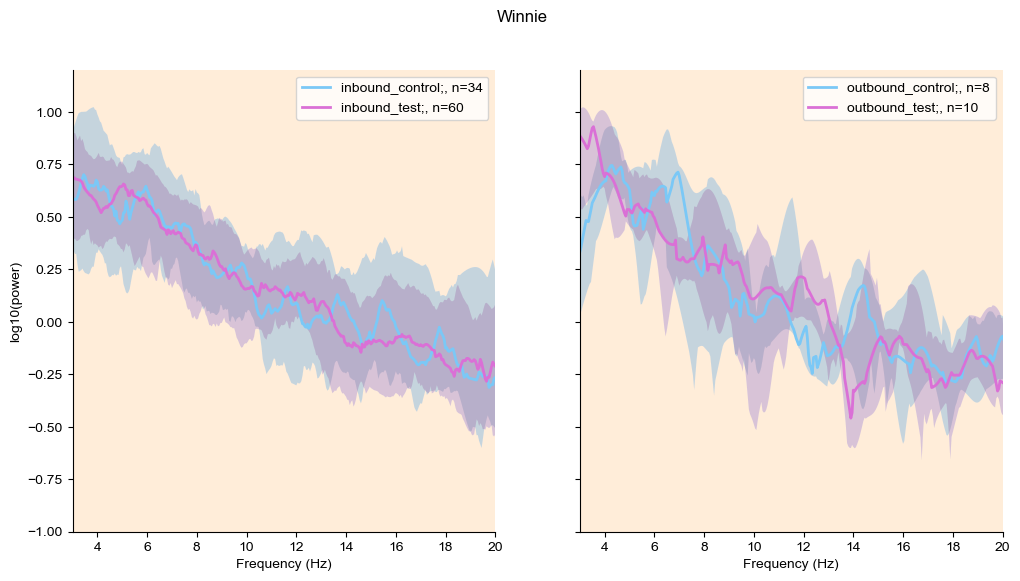

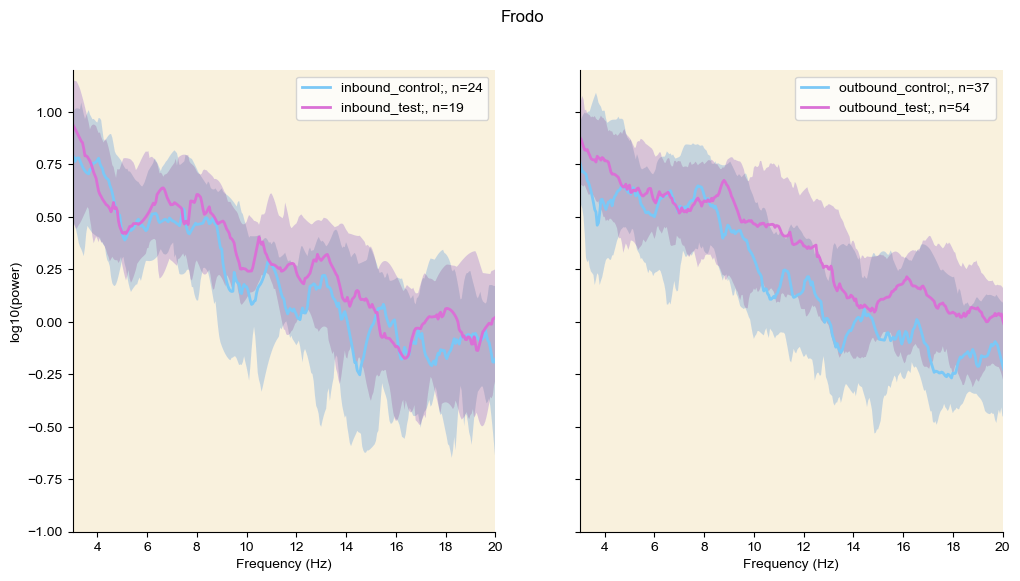

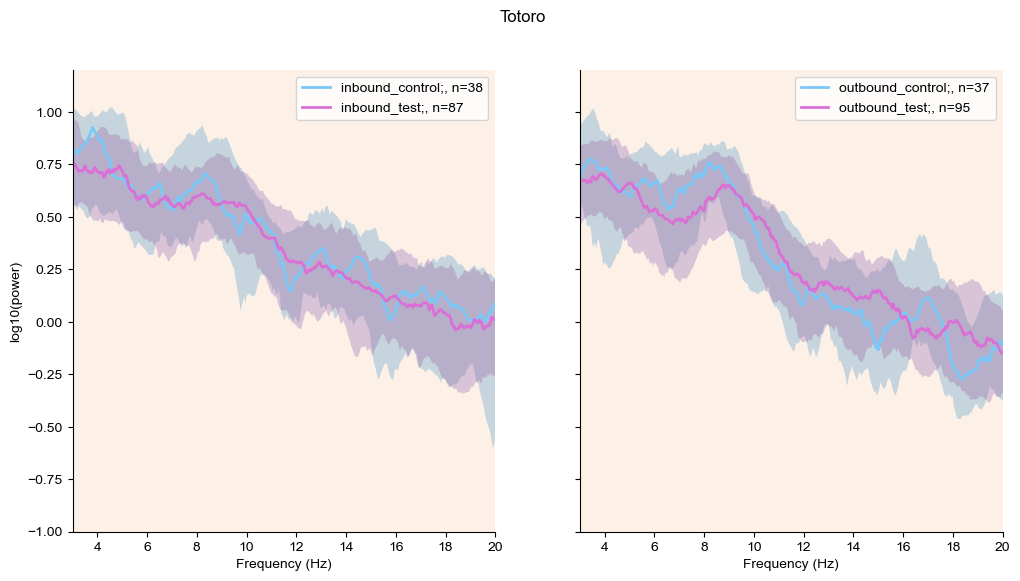

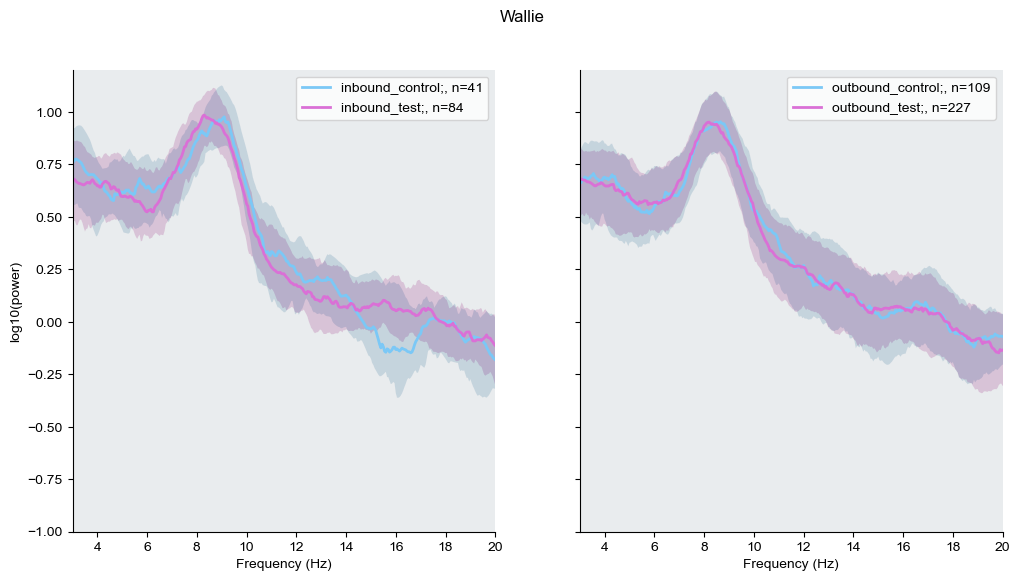

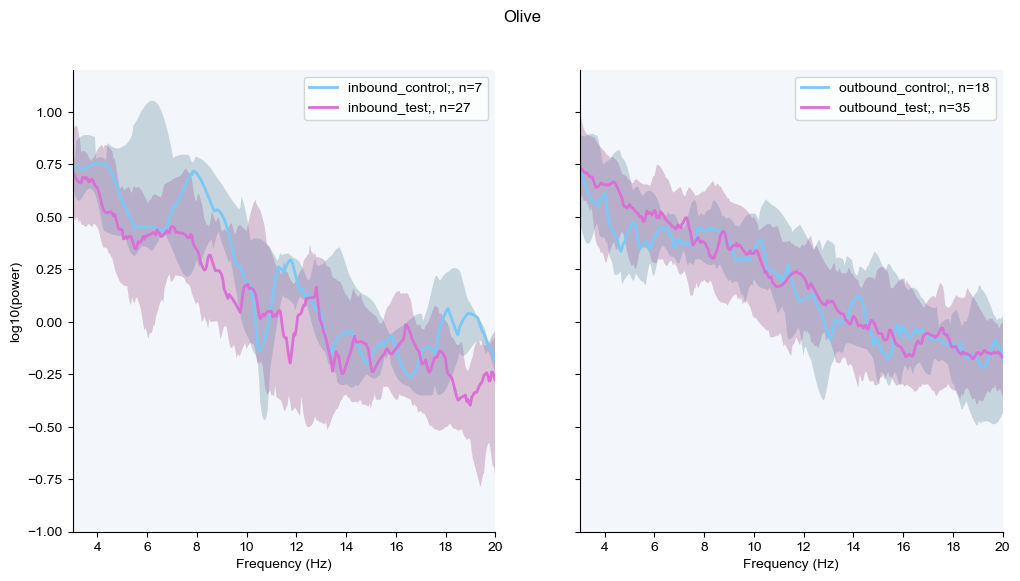

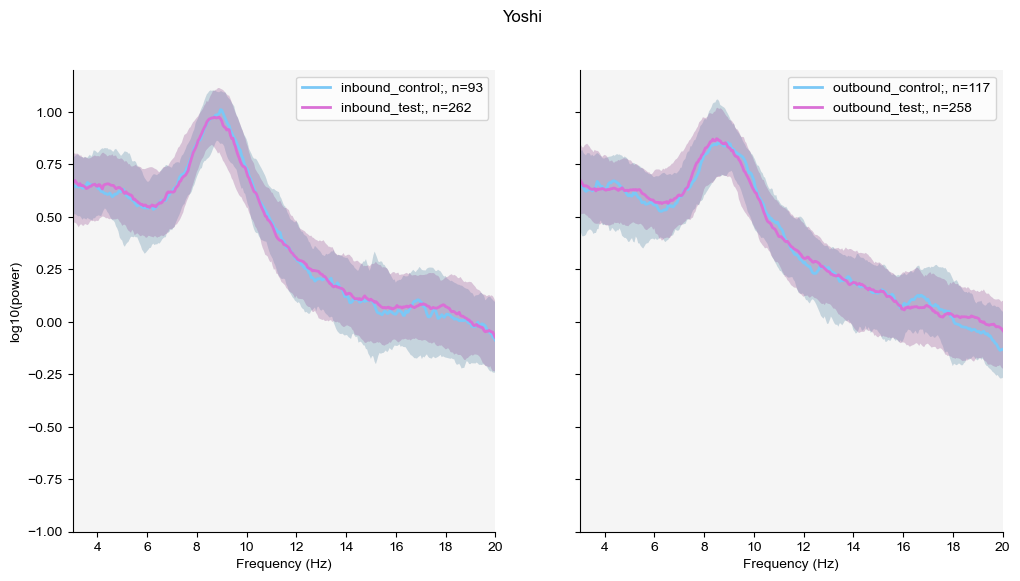

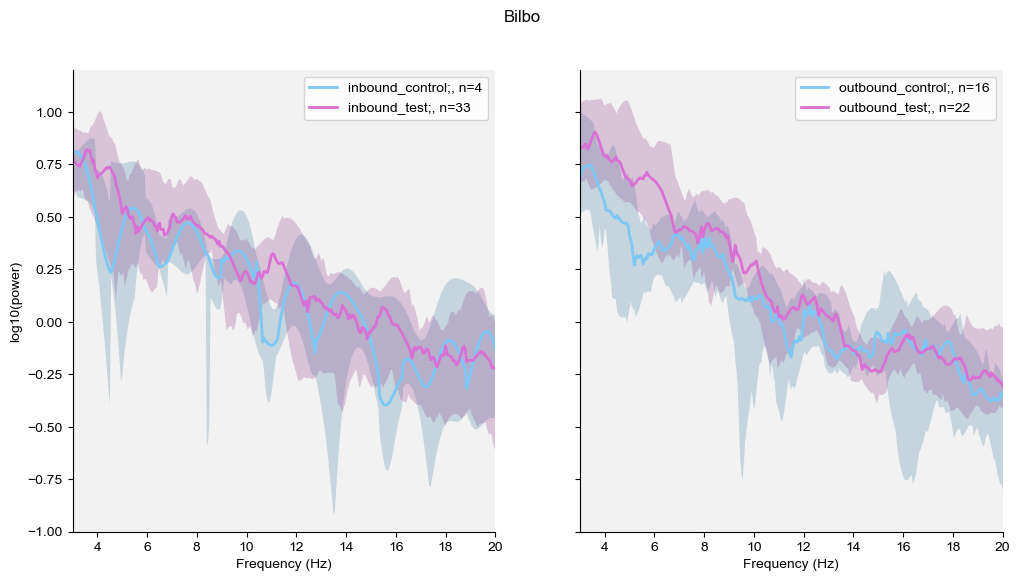

In [20]:
track_type = "early_wtrack"
# track_type = "lineartrack"
window_size = 500
max_trial_length = 20
run_filter = 10
clip_distance = 10
smooth_distance = 0
weighted = False
plot_log = True
encoding_tag = ""  # "_opto_test_interval"
dlc_pos = True
filter_valid_times = True
filter_track = False

animal_list = animal_style.index
# animal_list = ["Winnie"
# animal_list = ["Totoro"]
# animal_list = ["Frodo"]
# animal_list = ["control", "transfected"]
animal_list = [x for x in animal_list if x not in ["control", "transfected"]]

missing_clusterless = []
missing_ahead_behind = []
missing_valid_times = []
compiled_results = {}

decode_filter_query = BadDecodes()  # & {"bad_decodes": False}
for animal in animal_list:
    if animal in [
        "Banner",
        "Odins",
        "Dan",
    ]:  # "transfected", "control"]:
        continue
    dataset_key = {"animal": animal, "track_type": track_type, "targeted_phase": 90}

    # get the keys for the data we're analyzing
    dataset = filter_opto_data(dataset_key)
    key_pairs = []
    for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):

        trial_keys = (
            TrialIntervals()
            * (TaskEpoch * (PositionIntervalMap() & key)).proj(
                waveform_features_group_name="interval_list_name"
            )
        ).fetch("nwb_file_name", "epoch", "waveform_features_group_name", as_dict=True)
        # if not len(trial_keys):
        #     print("No trial keys", key)
        #     continue

        pos_group_name = (
            "DLC " + key["position_interval_name"]
            if dlc_pos
            else key["position_interval_name"]
        )
        if not (
            query := (
                (
                    ClusterlessDecodingV1()
                    # & "position_group_name LIKE 'DLC%'"
                    & {"nwb_file_name": key["nwb_file_name"]}
                    & {"position_group_name": pos_group_name}
                    & f"encoding_interval LIKE '%valid times{encoding_tag}'"
                    # & trial_keys
                )
                & decode_filter_query
            )
        ):
            print("No clusterless decoding", key)
            missing_clusterless.append(key)
            continue
        clusterless_keys = [query.fetch1("KEY") for k in trial_keys]

        opto_key = key.copy()
        opto_key["interval_list_name"] = opto_key.pop("position_interval_name")
        key_pairs.append((trial_keys, clusterless_keys, opto_key))

    spectrum_results = {}

    # run analysis across key sets
    for i in range(len(key_pairs)):
        trial_key, clusterless_key, opto_key = key_pairs[i]

        outbound_intervals = (TrialIntervals() & trial_key).fetch1(
            "outbound_trial_intervals"
        )
        inbound_intervals = (TrialIntervals() & trial_key).fetch1(
            "inbound_trial_intervals"
        )

        control_intervals, test_intervals = (OptoStimProtocol() & opto_key).fetch1(
            "control_intervals", "test_intervals"
        )

        if not (ClusterlessAheadBehindDistance() & clusterless_key):
            print("No ahead behind distance", clusterless_key)
            missing_ahead_behind.append(clusterless_key)
            continue
        ahead_behind = np.squeeze(
            (ClusterlessAheadBehindDistance() & clusterless_key)
            .fetch1_dataframe()
            .values
        )
        if clip_distance:
            ahead_behind = np.clip(ahead_behind, -clip_distance, clip_distance)
        if smooth_distance:
            ahead_behind = smooth(
                ahead_behind, smooth_distance * 3, smooth_distance, hamming=True
            )
        results = (ClusterlessDecodingV1() & clusterless_key).fetch_results()
        ahead_behind.shape, results.time.shape

        run_intervals = get_running_valid_intervals(
            opto_key, filter_speed=run_filter, seperate_optogenetics=False, dlc_pos=True
        )
        run_intervals = np.array(run_intervals)

        if filter_valid_times:
            query_valid = ClusterlessValidDecodeTimes() & clusterless_key
            if not query_valid:
                print("No valid times entry", clusterless_key)
                missing_valid_times.append(clusterless_key)
                continue
            opto_valid, control_valid = query_valid.fetch1(
                "opto_valid_decode_times", "control_valid_decode_times"
            )
            valid_intervals = interval_list_union(
                np.array(opto_valid), np.array(control_valid)
            )
            if valid_intervals.size == 0:
                print("No valid intervals", clusterless_key)
                continue
            run_intervals = interval_list_intersect(
                np.array(run_intervals), valid_intervals
            )
            # run_intervals = interval_list_intersect(np.array(run_intervals), np.array(control_valid))

        if filter_track:
            track_key = {
                "nwb_file_name": clusterless_key[0]["nwb_file_name"],
                "decode_group_name": key[
                    "position_interval_name"
                ],  # clusterless_key[0]["position_group_name"],
            }
            query = TrackCellCoverage() & track_key
            if not query:
                print("No track_coverage results", clusterless_key)
                continue
            good_track_times = query.fetch_good_coverage_times()

        for opto_interval, opto_type in zip(
            [control_intervals, test_intervals], ["control", "test"]
        ):
            for trial_list, trial_type in zip(
                [outbound_intervals, inbound_intervals],
                ["outbound", "inbound"],
            ):
                if not len(trial_list):
                    continue
                interval_type = f"{trial_type}_{opto_type}"
                interval_list = interval_list_intersect(
                    np.array(trial_list), np.array(opto_interval)
                )
                if not len(interval_list):
                    continue

                if run_filter:
                    interval_list = interval_list_intersect(
                        interval_list, run_intervals
                    )
                if filter_track:
                    interval_list = interval_list_intersect(
                        interval_list, good_track_times
                    )
                    if not len(interval_list):
                        continue

                spectrums = []
                weights = []

                for interval in interval_list:
                    rng = np.digitize(interval, results.time)
                    if rng[1] - rng[0] < window_size:
                        continue
                    if interval[1] - interval[0] > max_trial_length:
                        continue
                    f, power, weight = power_spectrum(
                        data=ahead_behind[rng[0] : rng[1]],
                        window_size=window_size,
                        sampling_rate=500,
                    )
                    spectrums.append(power)
                    weights.append(weight)
                spectrums = np.array(spectrums)
                weights = np.array(weights)

                if interval_type not in spectrum_results:
                    spectrum_results[interval_type] = {"spectrums": [], "weights": []}
                # if
                assert spectrums.shape[0] == weights.shape[0]
                spectrum_results[interval_type]["spectrums"].extend(spectrums)
                spectrum_results[interval_type]["weights"].extend(weights)

        # break

    # plot the results
    if not spectrum_results:
        continue
    compiled_results[animal] = spectrum_results
    fig, ax_list = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
    for name, result in spectrum_results.items():
        if "control" in name:
            color = interval_style["control"]
        else:
            color = interval_style["test"]
        if "inbound" in name:
            ax = ax_list[0]
        else:
            ax = ax_list[1]
        weights = np.array(result["weights"])
        if not (len(result["spectrums"])):
            continue
        power = result["spectrums"] * f
        if plot_log:
            power = np.log10(power)
        ind = np.logical_and(
            ~np.isnan(power).any(axis=1), ~np.isinf(power[:, 1:]).any(axis=1)
        )
        power = power[ind]

        if weighted:
            mid = np.average(power, axis=0, weights=weights[ind])
        else:
            mid = np.average(
                power,
                axis=0,
            )  # weights=weights)

        mid = np.array(
            [
                weighted_quantile(power[:, ii], 0.5, weights)
                for ii in range(power.shape[1])
            ]
        )
        low = np.array(
            [
                weighted_quantile(power[:, ii], 0.25, weights)
                for ii in range(power.shape[1])
            ]
        )
        high = np.array(
            [
                weighted_quantile(power[:, ii], 0.75, weights)
                for ii in range(power.shape[1])
            ]
        )
        ax.plot(
            f, mid, label=f"{name};, n={len(result['spectrums'])}", color=color, lw=2
        )
        ax.fill_between(f, low, high, alpha=0.2, facecolor=color)
        ax.fill_between(f, low, high, facecolor="white", zorder=-3)
        ax.fill_between(f, low, high, facecolor="grey", zorder=-1, alpha=0.3)

        ax.set_xlim(3, 20)
    ax_list[1].legend()
    fig.suptitle(animal)
    for a in ax_list:
        a.set_xlabel("Frequency (Hz)")
        a.legend()
        a.set_ylim(-1, 1.2)
        a.spines[["top", "right"]].set_visible(False)
    ylabel = "log10(power)" if plot_log else "power"
    ax_list[0].set_ylabel(ylabel)
    color = animal_style.loc[animal]["color"]
    for ax in ax_list:
        ax.fill_between([0, 25], -10, 10, facecolor=color, alpha=0.15, zorder=-10)
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["svg.fonttype"] = "none"
    fig.savefig(
        f"./Figures_20241201/2025_clusterless_ahead_behind_spectrum_task_separated_wtrack_{encoding_tag}_{animal}.svg"
    )
    # break
    # plt.xlim(3, 15)

    # plt.ylim(-10,10)

In [14]:
animal_style

,color,alias,background
name,,,
Winnie,darkorange,Rat V,indianred
Frodo,goldenrod,Rat F,indianred
Totoro,sandybrown,Rat T,indianred
Banner,coral,Rat B,indianred
Odins,peru,Rat O,indianred
Wallie,slategrey,Rat W,grey
Olive,lightsteelblue,Rat L,grey
Yoshi,silver,Rat Y,grey
Bilbo,darkgrey,Rat I,grey


### Measurement of peak

inbound_control t=-5.921, p=0.00000
inbound_test t=-10.431, p=0.00000
outbound_control t=-3.863, p=0.00013
outbound_test t=-9.255, p=0.00000


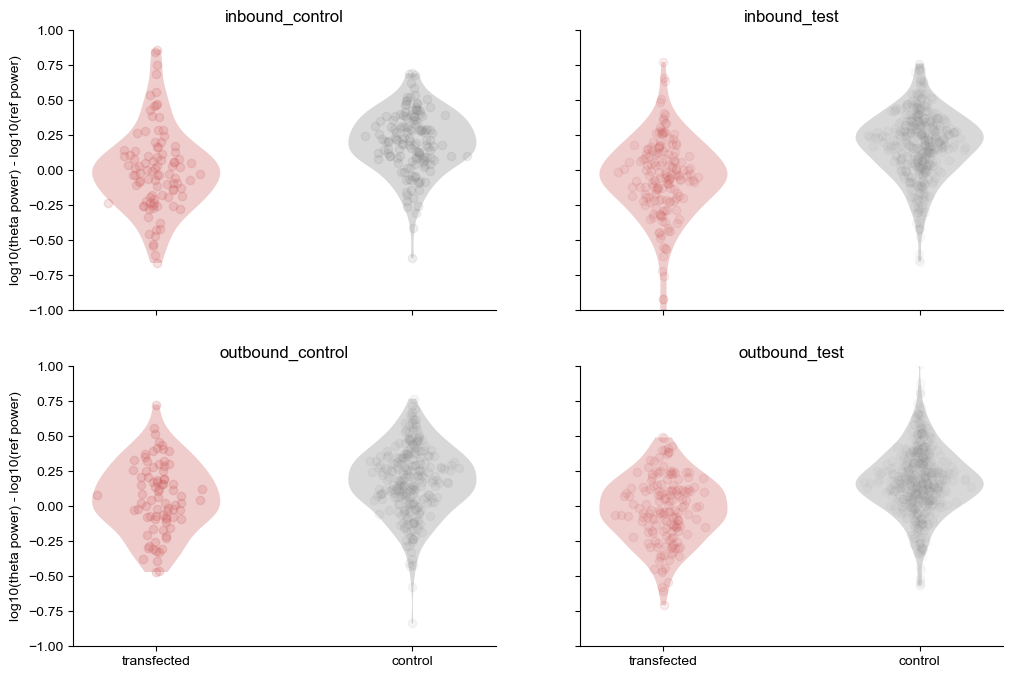

In [22]:
ind_measure = np.logical_and(np.array(f) >= 6, np.array(f) <= 10)  # 6-10Hz
ind_ref = np.logical_or(
    np.logical_and(np.array(f) >= 2, np.array(f) < 6),
    np.logical_and(np.array(f) > 10, np.array(f) <= 14),
)


fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12, 8))

stats_tests = {}
for i, animal in enumerate(["transfected", "control"]):
    for j, trial_type in enumerate(["inbound", "outbound"]):
        for k, opto_type in enumerate(["control", "test"]):
            cond = f"{trial_type}_{opto_type}"
            x = compiled_results[animal][cond]
            data = np.array(x["spectrums"])

            from Analysis.utils import violin_scatter

            color = animal_style.loc[animal]["color"]
            # measure = data[:,ind_measure].mean(axis=1) / data[:,ind_ref].mean(axis=1)
            measure = np.log10(data[:, ind_measure]).mean(axis=1) - np.log10(
                data[:, ind_ref]
            ).mean(axis=1)
            violin_scatter(
                measure,
                color=color,
                pos=i,
                ax=ax[j, k],
            )
            ax[j, k].set_title(cond)
            ax[j, k].set_ylim(-1, 1)
            ax[j, k].spines[["top", "right"]].set_visible(False)

            if stats_tests.get(cond) is None:
                stats_tests[cond] = []
            stats_tests[cond].append(measure)

for a in ax[:, 0]:
    a.set_ylabel("log10(theta power) - log10(ref power)")

for a in ax[0, :]:
    a.set_xticks([0, 1])
    a.set_xticklabels(["transfected", "control"])

from scipy.stats import ttest_ind

for cond, vals in stats_tests.items():
    if len(vals) != 2:
        continue
    t, p = ttest_ind(vals[0], vals[1])
    print(f"{cond} t={t:.3f}, p={p:.5f}")

plt.rcParams["svg.fonttype"] = "none"
# fig.savefig(
#     f"./Figures_20241201/clusterless_ahead_behind_spectrum_task_separated_wtrack_{encoding_tag}_stats.pdf"
# )

### Measurement of peak (single suplot)

inbound_control t=-5.921, p=0.00000
inbound_test t=-10.431, p=0.00000
outbound_control t=-3.863, p=0.00013
outbound_test t=-9.255, p=0.00000


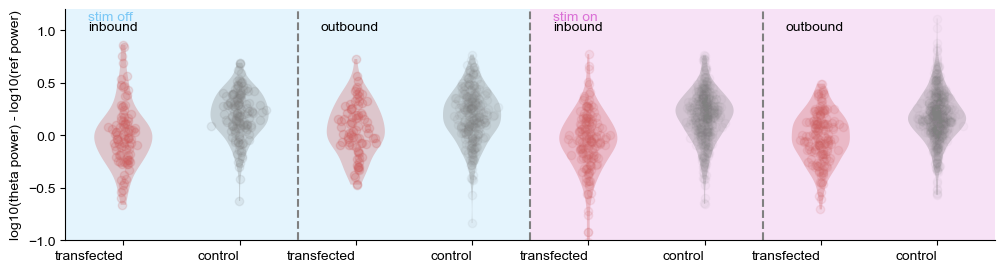

In [ ]:
ind_measure = np.logical_and(np.array(f) >= 6, np.array(f) <= 10)  # 6-10Hz
ind_ref = np.logical_or(
    np.logical_and(np.array(f) >= 2, np.array(f) < 6),
    np.logical_and(np.array(f) > 10, np.array(f) <= 14),
)


fig = plt.figure(figsize=(12, 3))
fontsize = 10
ax = fig.gca()


group_stats_tests = {
    trial_: {"control": [], "test": []} for trial_ in ["inbound", "outbound"]
}
ticks = []
labels = []
for i, animal in enumerate(["transfected", "control"]):
    for j, trial_type in enumerate(["inbound", "outbound"]):

        for k, opto_type in enumerate(["control", "test"]):
            cond = f"{trial_type}_{opto_type}"
            x = compiled_results[animal][cond]
            data = np.array(x["spectrums"])

            from Analysis.utils import violin_scatter

            color = animal_style.loc[animal]["color"]
            # measure = data[:,ind_measure].mean(axis=1) / data[:,ind_ref].mean(axis=1)
            measure = np.log10(data[:, ind_measure]).mean(axis=1) - np.log10(
                data[:, ind_ref]
            ).mean(axis=1)

            x_loc = k * 4 + j * 2 + i
            violin_scatter(
                measure,
                color=color,
                pos=x_loc,
                ax=ax,
            )
            ax.spines[["top", "right"]].set_visible(False)

            group_stats_tests[trial_type][opto_type].append(measure)
            ticks.append(x_loc)
            labels.append(f"{animal}")

ax.set_ylabel("log10(theta power) - log10(ref power)")
ax.fill_between(
    [-1, 3.5], -10, 10, facecolor=interval_style["control"], alpha=0.2, zorder=-10
)
ax.fill_between(
    [3.5, 8], -10, 10, facecolor=interval_style["test"], alpha=0.2, zorder=-10
)

plt.xlim(-0.5, 7.5)
ax.set_ylim(-1, 1.2)
plt.xticks(ticks, labels, rotation=0, ha="right", fontsize=fontsize)

ax.axvline(
    [
        1.5,
    ],
    -1,
    1,
    color="grey",
    linestyle="--",
)
ax.axvline(
    [
        3.5,
    ],
    color="grey",
    linestyle="--",
)
ax.axvline(
    [
        5.5,
    ],
    color="grey",
    linestyle="--",
)

for xx in [0, 4]:
    plt.text(xx - 0.3, 1.0, "inbound", fontsize=fontsize)
for xx in [2, 6]:
    plt.text(xx - 0.3, 1.0, "outbound", fontsize=fontsize)

plt.text(-0.3, 1.1, "stim off", color=interval_style["control"], fontsize=fontsize)
plt.text(4 - 0.3, 1.1, "stim on", color=interval_style["test"], fontsize=fontsize)

for trial_type in group_stats_tests:
    for opto_type in group_stats_tests[trial_type]:
        measure = group_stats_tests[trial_type][opto_type]
        pval = ttest_ind(*measure)
        print(f"{trial_type}_{opto_type} t={pval.statistic:.3f}, p={pval.pvalue:.5f}")

# for a in ax[0, :]:
#     a.set_xticks([0, 1])
#     a.set_xticklabels(["transfected", "control"])

# from scipy.stats import ttest_ind

# for cond, vals in stats_tests.items():
#     if len(vals) != 2:
#         continue
#     t, p = ttest_ind(vals[0], vals[1])
#     print(f"{cond} t={t:.3f}, p={p:.5f}")

# plt.rcParams["svg.fonttype"] = "none"
# fig.savefig(
#     f"./Figures_20241201/clusterless_ahead_behind_spectrum_task_separated_wtrack_{encoding_tag}_stats.pdf"
# )

### Measurement of peak Mixed Linear Model

In [28]:
# group_stats_tests = {
#     trial_: {"control": [], "test": []} for trial_ in ["inbound", "outbound"]
# }
# ticks = []
# labels = []
animal_list = list(compiled_results.keys())
animal_list = [_ for _ in animal_list if _ not in ["control", "transfected"]]

ind_measure = np.logical_and(np.array(f) >= 6, np.array(f) <= 10)  # 6-10Hz
ind_ref = np.logical_or(
    np.logical_and(np.array(f) >= 2, np.array(f) < 6),
    np.logical_and(np.array(f) > 10, np.array(f) <= 14),
)

model_df = []
for i, animal in enumerate(animal_list):
    for j, trial_type in enumerate(["inbound", "outbound"]):
        for k, opto_type in enumerate(["control", "test"]):
            cond = f"{trial_type}_{opto_type}"
            x = compiled_results[animal][cond]
            data = np.array(x["spectrums"])
            measure = np.log10(data[:, ind_measure]).mean(axis=1) - np.log10(
                data[:, ind_ref]
            ).mean(axis=1)
            # group_stats_tests[trial_type][opto_type].append(measure)

            model_df.extend(
                [
                    {
                        "Animal": animal,
                        "Trial": trial_type,
                        "Interval": opto_type,
                        "Treatment": (
                            "transfected"
                            if animal_style.loc[animal, "background"] == "indianred"
                            else "control"
                        ),
                        "Measure": m,
                    }
                    for m in measure
                ]
            )
            print
import pandas as pd

model_df = pd.DataFrame(model_df)

from statsmodels.formula.api import mixedlm

# Convert the 'Treatment' column to a categorical variable
model_df["Treatment"] = model_df["Treatment"].astype("category")
model_df["Interval"] = model_df["Interval"].astype("category")
model_df["Trial"] = model_df["Trial"].astype("category")

# Fit the mixed-effects model
model = mixedlm("Measure ~ Treatment * Interval ", model_df, groups=model_df["Animal"])
result = model.fit()

# Print the summary of the model
print(result.summary())

                       Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           Measure
No. Observations:            1856              Method:                       REML   
No. Groups:                  7                 Scale:                        0.0537 
Min. group size:             75                Log-Likelihood:               57.8458
Max. group size:             730               Converged:                    Yes    
Mean group size:             265.1                                                  
------------------------------------------------------------------------------------
                                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept                                  0.094    0.064  1.458 0.145 -0.032  0.220
Treatment[T.transfected]                  -0.075    0.099 -0.757 0.449 -0.268  0.119
Inte

In [25]:
model_df

,Animal,Trial,Interval,Treatment,Measure
0,Winnie,inbound,control,transfected,-0.206166
1,Winnie,inbound,control,transfected,0.038889
2,Winnie,inbound,control,transfected,-0.173344
3,Winnie,inbound,control,transfected,-0.189971
4,Winnie,inbound,control,transfected,0.058374
...,...,...,...,...,...
1851,Bilbo,outbound,test,control,-0.158241
1852,Bilbo,outbound,test,control,0.060679
1853,Bilbo,outbound,test,control,-0.555534
1854,Bilbo,outbound,test,control,0.024457


### Heirarchical bootstrap

In [ ]:
animal_groups = {
    "transfected": [
        "Winnie",
        "Totoro",
        "Frodo",
    ],
    "control": [
        "Yoshi",
        "Wallie",
        "Olive",
        "Bilbo",
    ],
}
from tqdm import tqdm

In [ ]:
n_boot = 10000


bootstrap_results = {}

for group, animals in animal_groups.items():
    bootstrap_results[group] = {}
    for trial_type in ["inbound", "outbound"]:
        for interval_type in ["control", "test"]:
            cond = f"{trial_type}_{interval_type}"

            m_ = []
            for _ in tqdm(range(n_boot), desc=f"Bootstrapping {group} {cond}"):
                animal_samples = np.random.choice(animals, len(animals), replace=True)
                spectrums = []
                weights = []
                for animal in animal_samples:
                    animal_spectrums = np.array(
                        compiled_results[animal][cond]["spectrums"]
                    )
                    animal_weights = np.array(compiled_results[animal][cond]["weights"])
                    spect_samples = np.random.choice(
                        len(animal_spectrums), len(animal_spectrums), replace=True
                    )
                    spectrums.extend(animal_spectrums[spect_samples])
                    weights.extend(animal_weights[spect_samples])
                spectrums = np.array(spectrums)
                weights = np.array(weights)
                measures = np.log10(spectrums[:, ind_measure]).mean(axis=1) - np.log10(
                    spectrums[:, ind_ref]
                ).mean(axis=1)
                # m_.append(np.mean(measures, axis=0))
                m_.append(np.average(measures, axis=0, weights=weights))
            m_ = np.array(m_)
            bootstrap_results[group][cond] = m_

Bootstrapping control outbound_test: 100%|██████████| 10000/10000 [02:21<00:00, 70.92it/s]


In [106]:
bootstrap_results.keys()

dict_keys(['transfected', 'control'])

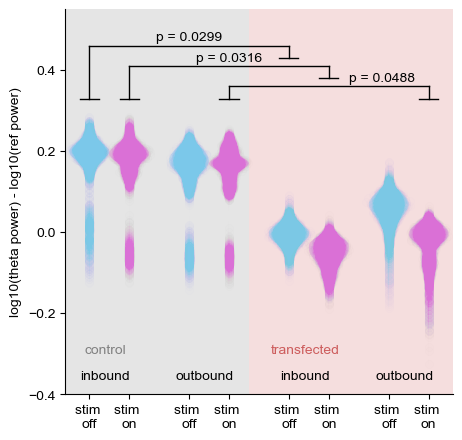

In [ ]:
ticks = []
labels = []
from Analysis.utils import violin_scatter

fig = plt.figure(figsize=(5, 5))
for i, group in enumerate(["control", "transfected"]):
    for j, cond in enumerate(bootstrap_results[group]):
        scores = bootstrap_results[group][cond]
        color = (
            interval_style["control"] if "control" in cond else interval_style["test"]
        )
        cond_name = "stim off" if cond == "control" else "stim on"
        xloc = 2.5 * i + j * 0.5 + (j // 2) * 0.25
        violin_scatter(scores, pos=[xloc], color=color)
        ticks.append(xloc)
        # labels.append(f"{cond.split('_')[0] if cond.split('_')[1] == 'control' else ' '} \n {cond.split('_')[1]}")
        labels.append("stim \non" if cond.split("_")[1] == "test" else "stim \noff")


def test_diff_of_bootstrap_dist(dist1, dist2):
    diff = np.subtract.outer(dist1, dist2)
    diff = np.ravel(diff)
    # standarize the sign of the difference
    if np.mean(diff) < 0:
        diff = -diff
    p_val = np.sum(diff < 0) / diff.size
    return p_val


# # test for transfection driven differences in each sub condition
# transfection_p_vals = []
# for cond in bootstrap_results["transfected"]:
#     dists = [
#         bootstrap_results["transfected"][cond],
#         bootstrap_results["control"][cond],
#     ]
#     p_val = test_diff_of_bootstrap_dist(*dists)
#     print(f"transfection effect ({cond} interval) p-value: {p_val:.3f}")
#     transfection_p_vals.append(p_val)

# # test for effect of control vs test interval
# for i, group in enumerate(bootstrap_results):
#     for trial_type in ["inbound", "outbound"]:
#         dists = [
#             bootstrap_results[group][f"{trial_type}_control"],
#             bootstrap_results[group][f"{trial_type}_test"],
#         ]
#         p_val = test_diff_of_bootstrap_dist(*dists)
#         print(
#             f"interval effect ({group} animals, {trial_type} trials) p-value: {p_val:.3f}"
#         )
# # test for trial type driven differences in each interval
# for i, group in enumerate(bootstrap_results):
#     for interval_type in ["control", "test"]:
#         dists = [
#             bootstrap_results[group][f"inbound_{interval_type}"],
#             bootstrap_results[group][f"outbound_{interval_type}"],
#         ]
#         p_val = test_diff_of_bootstrap_dist(*dists)
#         print(
#             f"trial type effect ({group} animals, {interval_type} interval) p-value: {p_val:.5f}"
#         )


global_shift = 0.09
# indicate sig difference
y_max = 0.42 - global_shift
y_bridge = 0.45 - global_shift
x1 = ticks[3]
x2 = ticks[7]
bar_rng = 0.12
plt.plot([x1, x2], [y_bridge, y_bridge], color="k", lw=1)
plt.plot([x1, x1], [y_max, y_bridge], color="k", lw=1)
plt.plot([x2, x2], [y_max, y_bridge], color="k", lw=1)
plt.plot([x1 - bar_rng, x1 + bar_rng], [y_max, y_max], color="k", lw=1)
plt.plot([x2 - bar_rng, x2 + bar_rng], [y_max, y_max], color="k", lw=1)
plt.text(
    x1 + (x2 - x1) * 0.6,
    y_bridge + 0.02,
    # "* p < 0.05",
    f"p = {transfection_p_vals[-1]:.4f}",
    ha="left",
    va="center",
    fontsize=10,
    color="k",
)

# indicate sig difference
y_max = 0.42 - global_shift, 0.47 - global_shift
y_bridge = 0.50 - global_shift
x1 = ticks[1]
x2 = ticks[5]
plt.plot([x1, x2], [y_bridge, y_bridge], color="k", lw=1)
plt.plot([x1, x1], [y_max[0], y_bridge], color="k", lw=1)
plt.plot([x2, x2], [y_max[1], y_bridge], color="k", lw=1)
plt.plot([x1 - bar_rng, x1 + bar_rng], [y_max[0], y_max[0]], color="k", lw=1)
plt.plot([x2 - bar_rng, x2 + bar_rng], [y_max[1], y_max[1]], color="k", lw=1)
plt.text(
    (x1 + x2) / 2,
    y_bridge + 0.02,
    # "* p < 0.05",
    f"p = {transfection_p_vals[1]:.4f}",
    ha="center",
    va="center",
    fontsize=10,
    color="k",
)

y_max = 0.42 - global_shift, 0.52 - global_shift
y_bridge = 0.55 - global_shift
x1 = ticks[0]
x2 = ticks[4]
plt.plot([x1, x2], [y_bridge, y_bridge], color="k", lw=1)
plt.plot([x1, x1], [y_max[0], y_bridge], color="k", lw=1)
plt.plot([x2, x2], [y_max[1], y_bridge], color="k", lw=1)
plt.plot([x1 - bar_rng, x1 + bar_rng], [y_max[0], y_max[0]], color="k", lw=1)
plt.plot([x2 - bar_rng, x2 + bar_rng], [y_max[1], y_max[1]], color="k", lw=1)
plt.text(
    (x1 + x2) / 2,
    y_bridge + 0.02,
    # "* p < 0.05",
    f"p = {transfection_p_vals[0]:.4f}",
    ha="center",
    va="center",
    fontsize=10,
    color="k",
)


plt.xticks(
    ticks,
    labels,
    rotation=0,
)
plt.ylabel(
    "log10(theta power) - log10(ref power)",
)
plt.xlim(-0.3, ticks[-1] + 0.3)

plt.fill_between(
    [-1, 2.0],
    -0.5,
    0.6,
    facecolor=animal_style.loc["control", "color"],
    alpha=0.2,
    zorder=-1,
)
plt.fill_between(
    [2.0, 10.25],
    -0.5,
    0.6,
    facecolor=animal_style.loc["transfected", "color"],
    alpha=0.2,
    zorder=-1,
)
plt.ylim(-0.4, 0.55)

fig.gca().spines[["top", "right"]].set_visible(False)

plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.family"] = "Arial"

for loc in [ticks[0], ticks[4]]:
    plt.text(
        loc + 0.2,
        -0.37,
        "inbound",
        ha="center",
        va="bottom",
        fontsize=10,
    )
for loc in [ticks[2], ticks[6]]:
    plt.text(
        loc + 0.2,
        -0.37,
        "outbound",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.text(
    ticks[4] + 0.2,
    -0.3,
    "transfected",
    ha="center",
    fontsize=10,
    color=animal_style.loc["transfected", "color"],
)
plt.text(
    ticks[0] + 0.2,
    -0.3,
    "control",
    ha="center",
    fontsize=10,
    color=animal_style.loc["control", "color"],
)
fig.savefig(
    "/home/sambray/Documents/MS_analysis_samsplaying/Figures202507/wtrack_decode_spectrum_score_heirarchical_bootstrap_correlation_coefficients.svg"
)

### Heirarchical merge all intervals

In [ ]:
n_boot = 10000
bootstrap_results = {}

for group, animals in animal_groups.items():
    # bootstrap_results[group] = {}
    # for trial_type in ["inbound", "outbound"]:
    #     for interval_type in ["control", "test"]:
    #         cond = f"{trial_type}_{interval_type}"

    m_ = []
    for _ in tqdm(range(n_boot), desc=f"Bootstrapping {group} {cond}"):
        animal_samples = np.random.choice(animals, len(animals), replace=True)
        spectrums = []
        weights = []
        for animal in animal_samples:
            animal_spectrums = np.concatenate(
                [
                    np.array(compiled_results[animal][cond]["spectrums"])
                    for cond in compiled_results[animal]
                ]
            )
            animal_weights = np.concatenate(
                [
                    np.array(compiled_results[animal][cond]["weights"])
                    for cond in compiled_results[animal]
                ]
            )
            spect_samples = np.random.choice(
                len(animal_spectrums), len(animal_spectrums), replace=True
            )
            spectrums.extend(animal_spectrums[spect_samples])
            weights.extend(animal_weights[spect_samples])
        spectrums = np.array(spectrums)
        weights = np.array(weights)
        measures = np.log10(spectrums[:, ind_measure]).mean(axis=1) - np.log10(
            spectrums[:, ind_ref]
        ).mean(axis=1)
        # m_.append(np.mean(measures, axis=0))
        m_.append(np.average(measures, axis=0, weights=weights))
    m_ = np.array(m_)
    bootstrap_results[group] = m_

Bootstrapping control outbound_test: 100%|██████████| 10000/10000 [11:37<00:00, 14.34it/s]


control mean: 0.165, std: 0.061
transfected mean: -0.019, std: 0.027


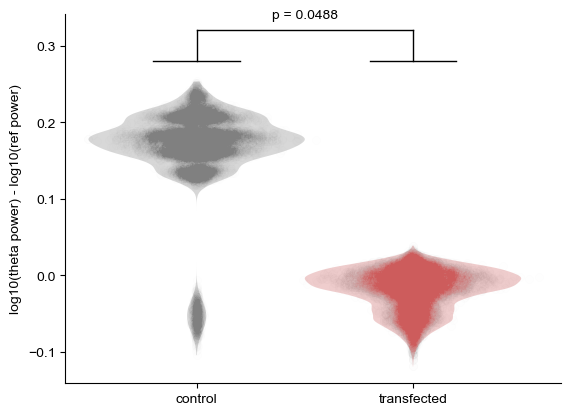

In [ ]:
fig = plt.figure()
for i, group in enumerate(["control", "transfected"]):
    print(
        f"{group} mean: {np.mean(bootstrap_results[group]):.3f}, std: {np.std(bootstrap_results[group]):.3f}"
    )
    violin_scatter(
        bootstrap_results[group], pos=[i / 2], color=animal_style.loc[group, "color"]
    )

plt.xticks([0, 0.5], ["control", "transfected"])
plt.ylabel("log10(theta power) - log10(ref power)")
fig.gca().spines[["top", "right"]].set_visible(False)
p_val = test_diff_of_bootstrap_dist(
    bootstrap_results["transfected"], bootstrap_results["control"]
)

global_shift = 0.09
# indicate sig difference
y_max = 0.28
y_bridge = 0.32
x1 = 0
x2 = 0.5
bar_rng = 0.1
plt.plot([x1, x2], [y_bridge, y_bridge], color="k", lw=1)
plt.plot([x1, x1], [y_max, y_bridge], color="k", lw=1)
plt.plot([x2, x2], [y_max, y_bridge], color="k", lw=1)
plt.plot([x1 - bar_rng, x1 + bar_rng], [y_max, y_max], color="k", lw=1)
plt.plot([x2 - bar_rng, x2 + bar_rng], [y_max, y_max], color="k", lw=1)
plt.text(
    x1 + (x2 - x1) * 0.5,
    y_bridge + 0.02,
    # "* p < 0.05",
    f"p = {transfection_p_vals[-1]:.4f}",
    ha="center",
    va="center",
    fontsize=10,
    color="k",
)

fig.savefig(
    "/home/sambray/Documents/MS_analysis_samsplaying/Figures202507/wtrack_decode_spectrum_score_heirarchical_bootstrap_POOLED.svg"
)

### Measurement of peak (inbound and outbound)

transfected_test t=-1.805, p=0.07163
control_test t=0.791, p=0.42916


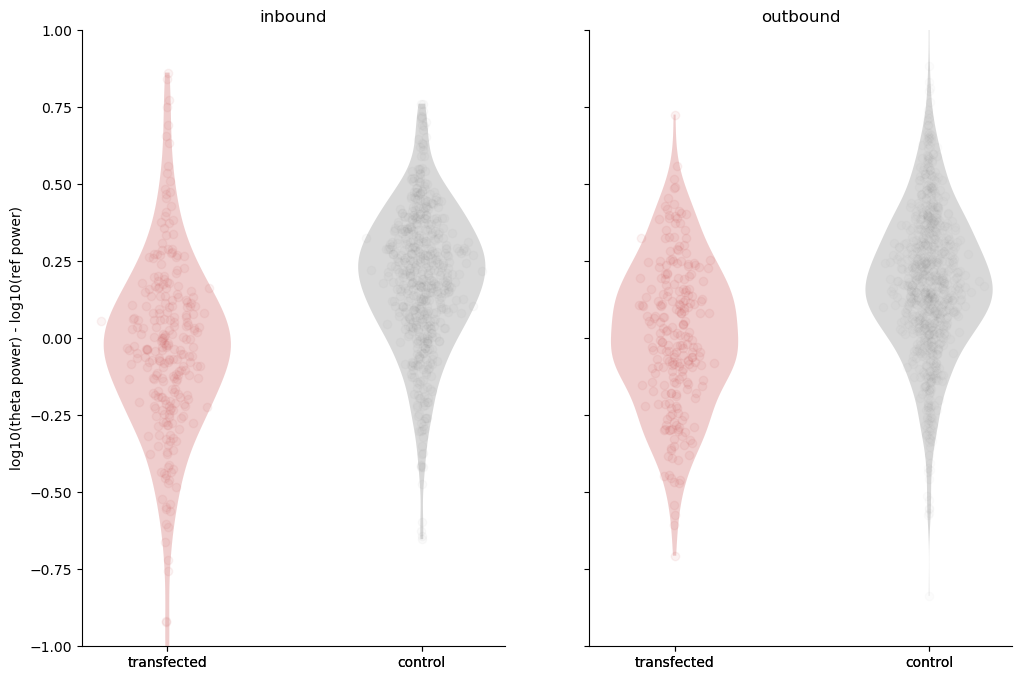

In [ ]:
encoding_tagind_measure = np.logical_and(np.array(f) >= 6, np.array(f) <= 10)  # 6-10Hz
ind_ref = np.logical_or(
    np.logical_and(np.array(f) >= 2, np.array(f) < 6),
    np.logical_and(np.array(f) > 10, np.array(f) <= 14),
)

plot_animals = ["transfected", "control"]
# plot_animals = [
#     a for a in compiled_results.keys() if a not in ["transfected", "control"]
# ]

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 8))
ax = ax[None, :]
stats_tests = {}

xloc = []
xlabels = []
for i, animal in enumerate(plot_animals):
    # for j, trial_type in enumerate(["inbound", "outbound"]):
    j = 0
    # for k, opto_type in enumerate(["control", "test"]):
    for k, trial_type in enumerate(["inbound", "outbound"]):
        data = []
        for opto_type in ["control", "test"]:
            cond = f"{trial_type}_{opto_type}"
            x = compiled_results[animal][cond]
            data.append(x["spectrums"])
        cond = f"{animal}_{opto_type}"
        data = np.concatenate(data, axis=0)

        from Analysis.utils import violin_scatter

        color = animal_style.loc[animal]["color"]
        measure = np.log10(data[:, ind_measure]).mean(axis=1) - np.log10(
            data[:, ind_ref]
        ).mean(axis=1)
        violin_scatter(
            measure,
            color=color,
            pos=i,
            ax=ax[j, k],
        )
        xloc.append(i)
        xlabels.append(animal)
        ax[j, k].set_title(trial_type)
        ax[j, k].set_ylim(-1, 1)
        ax[j, k].spines[["top", "right"]].set_visible(False)

        if stats_tests.get(cond) is None:
            stats_tests[cond] = []
        stats_tests[cond].append(measure)

for a in ax[:, 0]:
    a.set_ylabel("log10(theta power) - log10(ref power)")

for a in ax[0, :]:
    # a.set_xticks([0, 1])
    # a.set_xticklabels(["transfected", "control"])
    a.set_xticks(xloc)
    a.set_xticklabels(xlabels)

from scipy.stats import ttest_ind

for cond, vals in stats_tests.items():
    if len(vals) != 2:
        continue
    t, p = ttest_ind(vals[0], vals[1])
    print(f"{cond} t={t:.3f}, p={p:.5f}")

plt.rcParams["svg.fonttype"] = "none"
# fig.savefig(
#     f"./Figures_20241201/clusterless_ahead_behind_spectrum_task_separated_wtrack_{encoding_tag}_stats.pdf"
# )

# fig.savefig(
#     f"/home/sambray/Documents/MS_analysis_samsplaying/Plots/Figures_june2025/"
#     + "spectrum_stats_stim_merged.pdf"
# )

fig.savefig(
    f"/home/sambray/Documents/MS_analysis_samsplaying/Plots/Figures_june2025/"
    + "spectrum_stats_trials_merged_grouptransfections.pdf"
)

### Group by inbound/outbound, all animals in plot

In [7]:
compiled_results

{'Winnie': {'outbound_control': {'spectrums': [array([7.92531328e-01, 1.59121720e+00, 1.60958705e+00, ...,
           2.17679037e-04, 2.15212225e-04, 1.07190477e-04]),
    array([1.15928522e-01, 2.97900963e-01, 4.93180339e-01, ...,
           4.44768191e-04, 4.51262198e-04, 2.26723899e-04]),
    array([2.93133146e+00, 5.87751348e+00, 5.92178383e+00, ...,
           2.23543488e-04, 2.23055639e-04, 1.11446497e-04]),
    array([8.08827215e-01, 1.62238004e+00, 1.63640414e+00, ...,
           1.24513360e-04, 1.18390532e-04, 5.81791005e-05]),
    array([2.31267378e-01, 4.65780579e-01, 4.75488277e-01, ...,
           1.19637905e-04, 1.20201069e-04, 6.01945292e-05]),
    array([1.94056670e+00, 3.90125755e+00, 3.96072646e+00, ...,
           1.72121646e-03, 1.71876005e-03, 8.58982527e-04]),
    array([5.22341727e+00, 1.04808479e+01, 1.05822290e+01, ...,
           2.38433171e-03, 2.37653595e-03, 1.18693407e-03]),
    array([4.55722267e-01, 9.19141887e-01, 9.42006558e-01, ...,
           4.78864

transfected outbound_test 159
transfected inbound_test 166
control outbound_test 548
control inbound_test 406


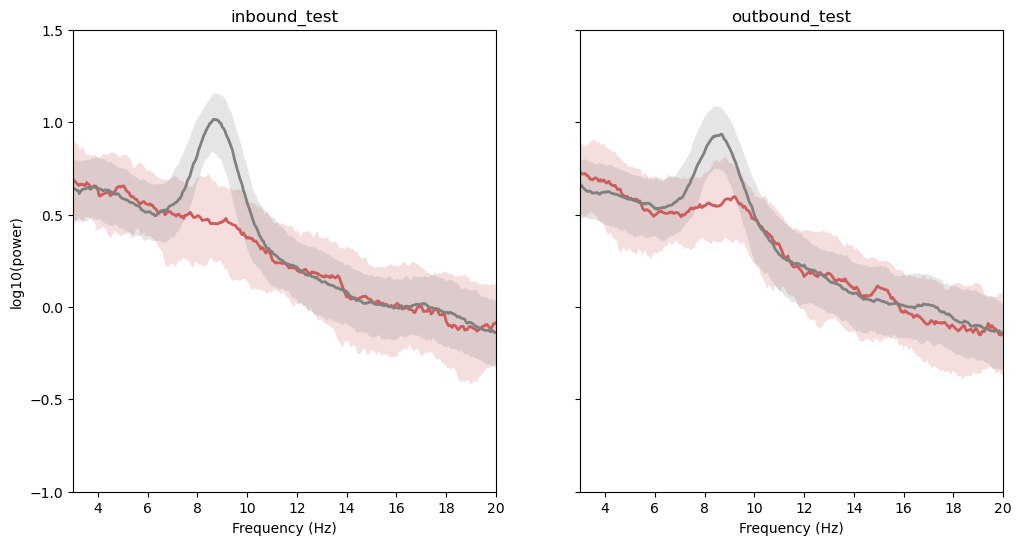

In [6]:
# plot the results

fig, ax_list = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)

for animal, spectrum_results in compiled_results.items():
    if animal not in ["control", "transfected"]:
        continue

    for name, result in spectrum_results.items():
        # if "control" in name:
        #     color = interval_style["control"]
        # else:
        #     color = interval_style["test"]
        if "control" in name:
            continue
        color = animal_style.loc[animal]["color"]
        if "inbound" in name:
            ax = ax_list[0]
        else:
            ax = ax_list[1]
        ax.set_title(name)
        weights = np.array(result["weights"])
        if not (len(result["spectrums"])):
            continue
        power = result["spectrums"] * f
        print(f"{animal} {name} {len(result['spectrums'])}")
        if plot_log:
            power = np.log10(power)
        ind = np.logical_and(
            ~np.isnan(power).any(axis=1), ~np.isinf(power[:, 1:]).any(axis=1)
        )
        power = power[ind]

        if weighted:
            mid = np.average(power, axis=0, weights=weights[ind])
        else:
            mid = np.average(
                power,
                axis=0,
            )  # weights=weights)

        mid = np.array(
            [
                weighted_quantile(power[:, ii], 0.5, weights)
                for ii in range(power.shape[1])
            ]
        )
        low = np.array(
            [
                weighted_quantile(power[:, ii], 0.25, weights)
                for ii in range(power.shape[1])
            ]
        )
        high = np.array(
            [
                weighted_quantile(power[:, ii], 0.75, weights)
                for ii in range(power.shape[1])
            ]
        )
        ax.plot(
            f, mid, label=f"{name};, n={len(result['spectrums'])}", color=color, lw=2
        )
        ax.fill_between(f, low, high, alpha=0.2, facecolor=color)

        ax.set_xlim(3, 20)
    # ax_list[1].legend()
    # fig.suptitle(animal)
for a in ax_list:
    a.set_xlabel("Frequency (Hz)")
    # a.legend()
    a.set_ylim(-1, 1.5)
ylabel = "log10(power)" if plot_log else "power"
ax_list[0].set_ylabel(ylabel)
plt.rcParams["svg.fonttype"] = "none"
# fig.savefig(
#     f"./Figures_20241201/clusterless_ahead_behind_spectrum_task_separated_animal_grouped_wtrack_.svg"
# )

### Continue

In [25]:
missing_valid_times

[]

In [8]:
(
    ClusterlessDecodingV1()
    & "position_group_name LIKE 'DLC%'"
    # & "encoding_interval LIKE '%valid times'"
    & trial_keys
)

nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters,results_path path to the results file,classifier_path path to the classifier file
Frodo20230814_.nwb,10_wtrack,DLC pos 9 valid times,ms_wtrack_2023_contfrag_clusterless_causal,pos 9 valid times,pos 9 valid times,0,=BLOB=,=BLOB=
Frodo20230814_.nwb,10_wtrack,DLC pos 9 valid times,ms_wtrack_2023_contfrag_clusterless_causal,pos 9 valid times_opto_control_interval,pos 9 valid times,0,=BLOB=,=BLOB=
Frodo20230814_.nwb,10_wtrack,DLC pos 9 valid times,ms_wtrack_2023_contfrag_clusterless_causal,pos 9 valid times_opto_test_interval,pos 9 valid times,0,=BLOB=,=BLOB=
Frodo20230814_.nwb,10_wtrack,DLC pos 9 valid times,ms_wtrack_2023_contfrag_clusterless_causal,pos 9 valid times_stimulus_on_interval,pos 9 valid times,0,=BLOB=,=BLOB=


In [23]:
missing_clusterless

[{'nwb_file_name': 'Wallie20220922_.nwb',
  'position_interval_name': 'pos 1 valid times',
  'dio_event_name': 'stim',
  'opto_infer_params_name': 'default_phase_targeting'},
 {'nwb_file_name': 'Wallie20220922_.nwb',
  'position_interval_name': 'pos 11 valid times',
  'dio_event_name': 'stim',
  'opto_infer_params_name': 'default_phase_targeting'},
 {'nwb_file_name': 'Yoshi20220518_.nwb',
  'position_interval_name': 'pos 15 valid times',
  'dio_event_name': 'stim',
  'opto_infer_params_name': 'default_phase_targeting'}]

(3.0, 8.0)

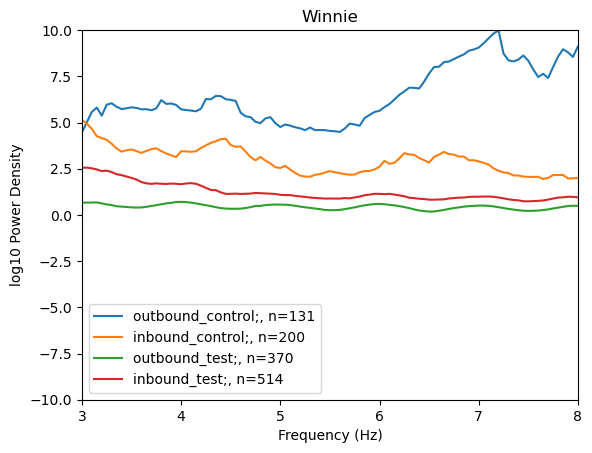

In [25]:
# plot the results
fig = plt.figure()
for name, result in spectrum_results.items():

    weights = np.array(result["weights"])
    power = result["spectrums"] * f
    # power = np.log10(power)
    ind = ~np.isnan(power).any(axis=1)
    power = power[ind]

    mid = np.average(power, axis=0, weights=weights[ind])
    mid = np.average(
        power,
        axis=0,
    )  # weights=weights)
    mid = np.median(power, axis=0)

    mid = np.array(
        [weighted_quantile(power[:, ii], 0.5, weights) for ii in range(power.shape[1])]
    )
    # low = np.array(
    #     [weighted_quantile(power[:, ii], 0.25, weights) for ii in range(power.shape[1])]
    # )
    # high = np.array(
    #     [weighted_quantile(power[:, ii], 0.75, weights) for ii in range(power.shape[1])]
    # )
    plt.plot(f, mid, label=f"{name};, n={len(result['spectrums'])}")
    # plt.fill_between(f, low, high, alpha=0.5)

plt.xlim(3, 20)
plt.legend()
plt.title(animal)
plt.xlabel("Frequency (Hz)")
plt.ylabel("log10 Power Density")
# plt.xlim(3, 15)

plt.ylim(-10, 10)

plt.xlim(3, 8)

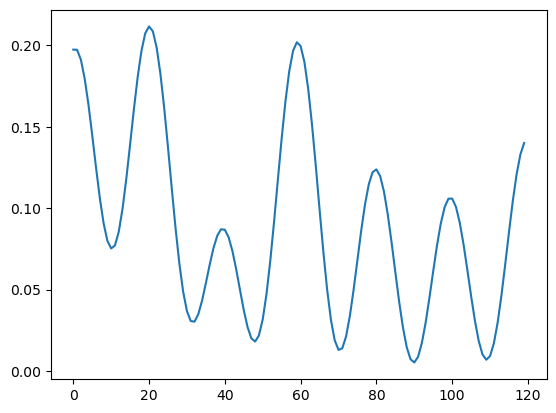

In [34]:
power[:, 1:].min()

power[:, 1:].max()

power[:, 1:].mean()
plt.plot(power[0, 80:200])

# Run and optogenetic intervals:

datasets: 44
No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 0 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 2 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Banner20220224_.nwb', 'position_interval_name': 'pos 4 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_fi

[2025-07-21 14:40:19,549][WARNING]: Skipped checksum for file with hash: 0644e3ac-da22-f181-be94-57e2e9214541, and path: /stelmo/nwb/analysis/Frodo20230814/Frodo20230814_ee5595eb-d776-4cff-9015-dd165a5734bd.nc
[14:40:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


No track_coverage results {'nwb_file_name': 'Frodo20230814_.nwb', 'waveform_features_group_name': '02_wtrack', 'position_group_name': 'DLC pos 1 valid times', 'decoding_param_name': 'ms_wtrack_2023_contfrag_clusterless_causal', 'encoding_interval': 'pos 1 valid times', 'decoding_interval': 'pos 1 valid times', 'estimate_decoding_params': 0}


[2025-07-21 14:40:23,180][WARNING]: Skipped checksum for file with hash: 59127b15-13f3-f7e5-3f46-a25717806543, and path: /stelmo/nwb/analysis/Frodo20230814/Frodo20230814_f4991e01-32c9-4bd5-9440-d1e77d8c1b06.nc
[14:40:25][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:40:25][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:40:25][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:40:25][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:40:25][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[2025-07-21 14:40:27,220][WARNING]: Skipped checksum for file with hash: cc3a5569-9880-e01a-8f69-db2811911e95, and path: /stelmo/nwb/analysis/Frodo202

No track_coverage results {'nwb_file_name': 'Totoro20220613_.nwb', 'waveform_features_group_name': '02_wtrack', 'position_group_name': 'DLC pos 1 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 1 valid times', 'decoding_interval': 'pos 1 valid times', 'estimate_decoding_params': 0}


[2025-07-21 14:41:05,749][WARNING]: Skipped checksum for file with hash: b8351995-5a26-698b-40d2-ee31d0b077ad, and path: /stelmo/nwb/analysis/Totoro20220613/Totoro20220613_c1f7cb04-40d5-4827-a397-24e335655ce1.nc
[14:41:08][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead


No track_coverage results {'nwb_file_name': 'Totoro20220613_.nwb', 'waveform_features_group_name': '04_wtrack', 'position_group_name': 'DLC pos 3 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 3 valid times', 'decoding_interval': 'pos 3 valid times', 'estimate_decoding_params': 0}


[2025-07-21 14:41:10,026][WARNING]: Skipped checksum for file with hash: cd092c62-3655-a9aa-8056-a6a237522d32, and path: /stelmo/nwb/analysis/Totoro20220614/Totoro20220614_5a09e7ce-c275-480a-9237-7607911caeeb.nc
[14:41:12][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:41:12][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:41:12][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:41:12][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:41:12][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[2025-07-21 14:41:13,666][WARNING]: Skipped checksum for file with hash: 814efa28-d2e1-c4be-59be-0e9257a90853, and path: /stelmo/nwb/analysis/Totoro

No track_coverage results {'nwb_file_name': 'Winnie20220719_.nwb', 'waveform_features_group_name': '10_wtrack', 'position_group_name': 'DLC pos 9 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 9 valid times', 'decoding_interval': 'pos 9 valid times', 'estimate_decoding_params': 0}
datasets: 42
No clusterless decoding {'nwb_file_name': 'Yoshi20220518_.nwb', 'position_interval_name': 'pos 15 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[2025-07-21 14:42:19,068][WARNING]: Skipped checksum for file with hash: e8b5b079-38d9-5f15-ef47-ebbeb1d73637, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_49e1fa2c-352c-4c8c-812b-fb1ac7acf9d9.nc
[14:42:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:42:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:42:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:42:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:42:21][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[2025-07-21 14:42:23,039][WARNING]: Skipped checksum for file with hash: 03329964-8979-0d0d-aa61-f50a7df8c486, and path: /stelmo/nwb/analysis/Bilbo202

No track_coverage results {'nwb_file_name': 'Bilbo20230802_.nwb', 'waveform_features_group_name': '08_wtrack', 'position_group_name': 'DLC pos 7 valid times', 'decoding_param_name': 'ms_wtrack_2023_contfrag_clusterless_causal', 'encoding_interval': 'pos 7 valid times', 'decoding_interval': 'pos 7 valid times', 'estimate_decoding_params': 0}


[2025-07-21 14:42:46,921][WARNING]: Skipped checksum for file with hash: dad591ac-cfd3-4a79-58c8-f79d6b4b55ee, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_b69199d0-9ea8-445d-ae63-e059853e9cb6.nc
[14:42:49][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:42:49][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:42:49][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:42:49][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:42:49][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[2025-07-21 14:42:51,168][WARNING]: Skipped checksum for file with hash: 2cab4880-17da-4e82-63ba-996a7bbbffa3, and path: /stelmo/nwb/analysis/Olive202

No ahead behind distance {'nwb_file_name': 'Olive20220711_.nwb', 'waveform_features_group_name': '14_wtrack', 'position_group_name': 'DLC pos 13 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}


[2025-07-21 14:42:59,482][WARNING]: Skipped checksum for file with hash: 3a5ec76e-66ef-57e3-098a-1a6e04d6468b, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_5b2b9c82-1e76-4d29-a4fc-f02db150da61.nc
[14:43:01][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:43:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:43:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:43:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:43:02][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[2025-07-21 14:43:03,621][WARNING]: Skipped checksum for file with hash: c10048af-56e5-a06a-f9d7-317c69fad593, and path: /stelmo/nwb/analysis/Olive202

No track_coverage results {'nwb_file_name': 'Wallie20220922_.nwb', 'waveform_features_group_name': '12_wtrack', 'position_group_name': 'DLC pos 11 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 11 valid times', 'decoding_interval': 'pos 11 valid times', 'estimate_decoding_params': 0}


[2025-07-21 14:43:29,133][WARNING]: Skipped checksum for file with hash: 3618b0a3-a76a-86d8-da56-ad6f3e137355, and path: /stelmo/nwb/analysis/Wallie20220922/Wallie20220922_42357b8b-54ec-4953-9ab3-bfbfdf5201ad.nc
[14:43:31][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:43:31][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:43:31][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:43:31][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:43:31][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[2025-07-21 14:43:33,313][WARNING]: Skipped checksum for file with hash: 3e199b8e-5b77-add1-ae91-2df46e3a6241, and path: /stelmo/nwb/analysis/Wallie

No track_coverage results {'nwb_file_name': 'Wallie20220922_.nwb', 'waveform_features_group_name': '10_wtrack', 'position_group_name': 'DLC pos 9 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 9 valid times', 'decoding_interval': 'pos 9 valid times', 'estimate_decoding_params': 0}


[2025-07-21 14:44:01,882][WARNING]: Skipped checksum for file with hash: f603f284-bbd0-3294-d85a-7b472e3dd316, and path: /stelmo/nwb/analysis/Yoshi20220517/Yoshi20220517_b091e6e9-b5fb-4353-bfc4-a00a702ab342.nc
[14:44:04][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:44:04][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:44:04][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:44:04][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[14:44:04][WARNING] Spyglass: DEPRECATION scheduled for Spyglass 0.6.0: interval_list_intersect
	Use Interval.intersect instead
[2025-07-21 14:44:06,037][WARNING]: Skipped checksum for file with hash: 07a2b8c3-8495-f785-fc0c-2aa27746cff6, and path: /stelmo/nwb/analysis/Yoshi202

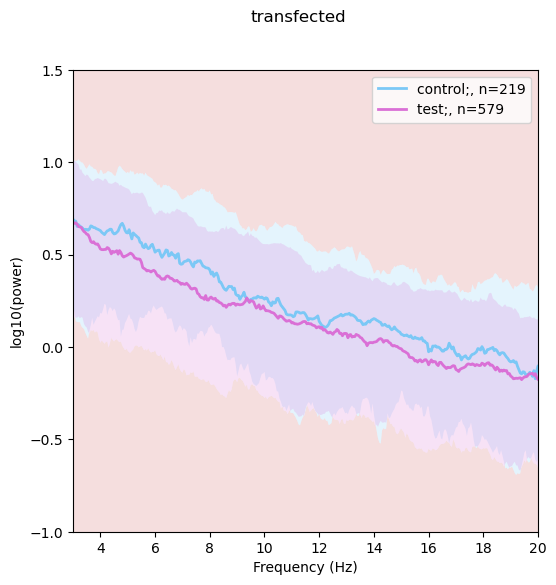

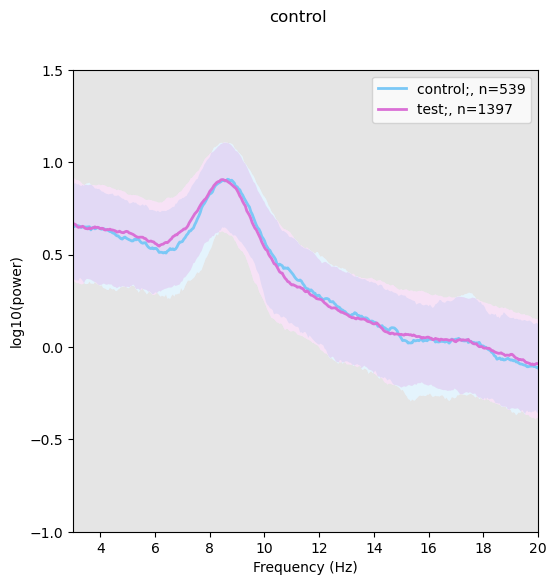

In [5]:
track_type = "early_wtrack"
# track_type = "lineartrack"
window_size = 500
max_trial_length = 20
run_filter = 10
clip_distance = 10
smooth_distance = 0
weighted = False
plot_log = True
encoding_tag = ""  # _opto_test_interval"
dlc_pos = "wtrack" in track_type
filter_track = True

base_key = {
    "track_type": track_type,
    "targeted_phase": 90,
    # "period_ms": 250,
    "min_pulse_length": 20,
}


animal_list = animal_style.index
# animal_list = ["Winnie"
# animal_list = ["Totoro"]
# animal_list = ["Frodo"]
animal_list = ["transfected", "control"]

missing_clusterless = []
missing_ahead_behind = []
compiled_results = {}
for animal in animal_list:
    if animal in ["Banner", "Odins", "Dan"]:
        continue
    dataset_key = {"animal": animal, **base_key}

    # get the keys for the data we're analyzing
    dataset = filter_opto_data(dataset_key)
    key_pairs = []
    for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):
        pos_group_name = (
            "DLC " + key["position_interval_name"]
            if dlc_pos
            else key["position_interval_name"]
        )
        if not (
            query := (
                ClusterlessDecodingV1()
                # & "position_group_name LIKE 'DLC%'"
                & {"nwb_file_name": key["nwb_file_name"]}
                & {"position_group_name": pos_group_name}
                & f"encoding_interval LIKE '%valid times{encoding_tag}'"
                & "decoding_param_name LIKE '%causal'"
                # & trial_keys
            )
        ):
            print("No clusterless decoding", key)
            missing_clusterless.append(key)
            continue
        clusterless_keys = query.fetch1("KEY")
        opto_key = key.copy()
        opto_key["interval_list_name"] = opto_key.pop("position_interval_name")
        key_pairs.append((clusterless_keys, opto_key))
    spectrum_results = {}

    # run analysis across key sets
    for i in range(len(key_pairs)):
        clusterless_key, opto_key = key_pairs[i]

        control_intervals, test_intervals = (OptoStimProtocol() & opto_key).fetch1(
            "control_intervals", "test_intervals"
        )

        if not (ClusterlessAheadBehindDistance() & clusterless_key):
            print("No ahead behind distance", clusterless_key)
            missing_ahead_behind.append(clusterless_key)
            continue
        ahead_behind = np.squeeze(
            (ClusterlessAheadBehindDistance() & clusterless_key)
            .fetch1_dataframe()
            .values
        )
        if clip_distance:
            ahead_behind = np.clip(ahead_behind, -clip_distance, clip_distance)
        if smooth_distance:
            ahead_behind = smooth(
                ahead_behind, smooth_distance * 3, smooth_distance, hamming=True
            )
        results = (ClusterlessDecodingV1() & clusterless_key).fetch_results()
        ahead_behind.shape, results.time.shape

        run_intervals = get_running_valid_intervals(
            opto_key,
            filter_speed=run_filter,
            seperate_optogenetics=False,
            dlc_pos=dlc_pos,
        )
        run_intervals = np.array(run_intervals)

        if filter_track:
            track_key = {
                "nwb_file_name": clusterless_key["nwb_file_name"],
                "decode_group_name": clusterless_key["position_group_name"],
            }
            query = TrackCellCoverage() & track_key
            if not query:
                print("No track_coverage results", clusterless_key)
                continue
            good_track_times = query.fetch_good_coverage_times()

        for opto_interval, opto_type in zip(
            [control_intervals, test_intervals], ["control", "test"]
        ):
            interval_type = opto_type
            interval_list = np.array(opto_interval)
            if not len(interval_list):
                continue

            if run_filter:
                interval_list = interval_list_intersect(
                    interval_list,
                    run_intervals,
                )
            if filter_track:
                interval_list = interval_list_intersect(
                    interval_list,
                    good_track_times,
                )

            spectrums = []
            weights = []

            for interval in interval_list:
                rng = np.digitize(interval, results.time)
                if rng[1] - rng[0] < window_size:
                    continue
                if interval[1] - interval[0] > max_trial_length:
                    continue
                f, power, weight = power_spectrum(
                    data=ahead_behind[rng[0] : rng[1]],
                    window_size=window_size,
                    sampling_rate=500,
                )
                spectrums.append(power)
                weights.append(weight)
            spectrums = np.array(spectrums)
            weights = np.array(weights)

            if interval_type not in spectrum_results:
                spectrum_results[interval_type] = {"spectrums": [], "weights": []}
            # if
            assert spectrums.shape[0] == weights.shape[0]
            spectrum_results[interval_type]["spectrums"].extend(spectrums)
            spectrum_results[interval_type]["weights"].extend(weights)
        # break

    # plot the results
    if not spectrum_results:
        continue
    compiled_results[animal] = spectrum_results
    fig, ax = plt.subplots(ncols=1, figsize=(6, 6), sharex=True, sharey=True)
    for name, result in spectrum_results.items():
        if "control" in name:
            color = interval_style["control"]
        else:
            color = interval_style["test"]

        weights = np.array(result["weights"])
        power = result["spectrums"] * f
        if plot_log:
            power = np.log10(power)
        ind = np.logical_and(
            ~np.isnan(power).any(axis=1), ~np.isinf(power[:, 1:]).any(axis=1)
        )
        power = power[ind]

        if weighted:
            mid = np.average(power, axis=0, weights=weights[ind])
        else:
            mid = np.average(
                power,
                axis=0,
            )  # weights=weights)

        mid = np.array(
            [
                weighted_quantile(power[:, ii], 0.5, weights)
                for ii in range(power.shape[1])
            ]
        )
        low = np.array(
            [
                weighted_quantile(power[:, ii], 0.25, weights)
                for ii in range(power.shape[1])
            ]
        )
        high = np.array(
            [
                weighted_quantile(power[:, ii], 0.75, weights)
                for ii in range(power.shape[1])
            ]
        )
        ax.plot(
            f, mid, label=f"{name};, n={len(result['spectrums'])}", color=color, lw=2
        )
        ax.fill_between(f, low, high, facecolor="white", zorder=-1)
        ax.fill_between(f, low, high, alpha=0.2, facecolor=color)

        ax.set_xlim(3, 20)
    ax.legend()
    fig.suptitle(animal)

    ax.set_xlabel("Frequency (Hz)")
    ax.legend()
    ax.set_ylim(-1, 1.5)
    ylabel = "log10(power)" if plot_log else "power"
    ax.set_ylabel(ylabel)
    color = animal_style.loc[animal]["color"]
    ax.fill_between([0, 25], -10, 10, facecolor=color, alpha=0.2, zorder=-10)

    # plt.rcParams["svg.fonttype"] = "none"
    # fig.savefig(
    #     f"./Figures_20241201/clusterless_ahead_behind_spectrum_task_combined_{track_type}_theta{dataset_key['targeted_phase']}_{animal}.svg"
    # )
    # plt.xlim(3, 15)

    # plt.ylim(-10,10)
    # break

In [ ]:
clusterless_key

from AnalysisTables.place_fields import TrackCellCoverage

track_key = {
    "nwb_file_name": clusterless_key["nwb_file_name"],
    "decode_group_name": clusterless_key["position_group_name"],
}
(TrackCellCoverage() & track_key).fetch_good_coverage_times()

array([[1.65810209e+09, 1.65810331e+09]])

In [8]:
compiled_results[animal]

{'control': {'spectrums': [array([0.37518983, 0.83678096, 1.0929602 , ..., 0.00401095, 0.00402072,
          0.00201201]),
   array([2.21876216e-01, 4.66894780e-01, 5.36122108e-01, ...,
          3.51089032e-04, 3.27337836e-04, 1.59697675e-04]),
   array([6.02471547e-03, 3.48248597e-02, 1.02384948e-01, ...,
          1.27904448e-05, 7.21589555e-06, 2.68882094e-06]),
   array([1.31068040e-02, 2.62209759e-02, 2.62399085e-02, ...,
          1.16558394e-07, 1.19257839e-07, 6.00972742e-08]),
   array([4.39186593e+00, 8.81509258e+00, 8.90836509e+00, ...,
          1.89779019e-03, 1.86823571e-03, 9.29186702e-04]),
   array([1.50622482, 3.08716191, 3.30893014, ..., 0.02123733, 0.02142359,
          0.01074301]),
   array([9.07450238e-02, 1.83175447e-01, 1.88228380e-01, ...,
          1.12718349e-05, 5.33574170e-06, 1.66467190e-06]),
   array([2.98203418e-01, 6.19643294e-01, 6.88385232e-01, ...,
          2.89813050e-04, 2.91361629e-04, 1.45938898e-04]),
   array([4.17459716e+00, 8.43273138e+00

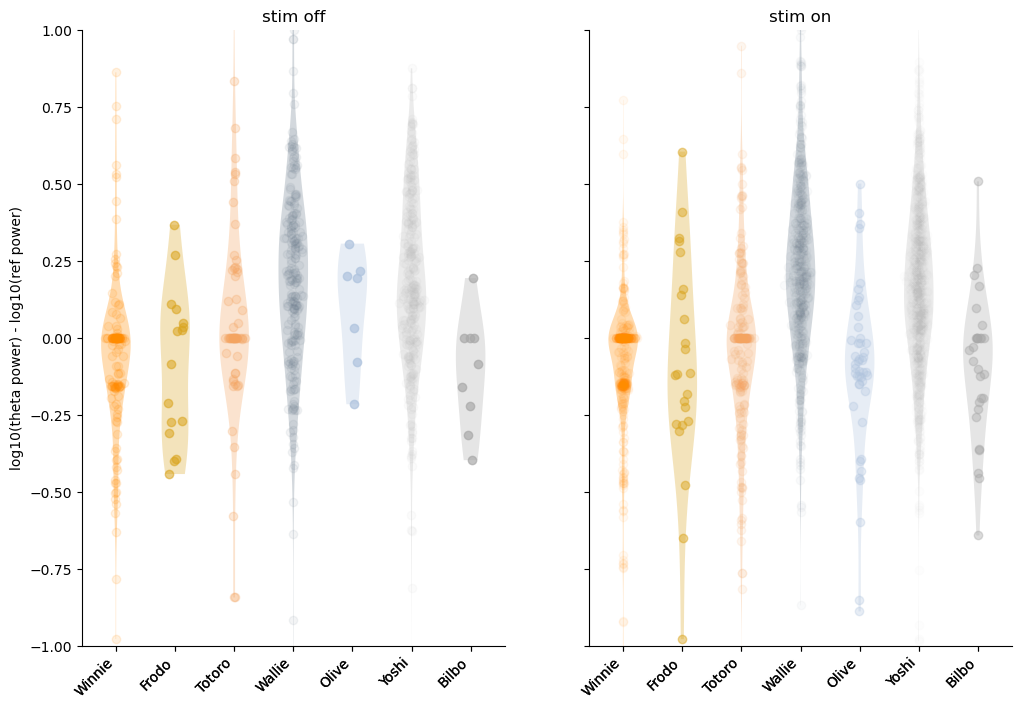

In [ ]:
ind_measure = np.logical_and(np.array(f) >= 6, np.array(f) <= 10)  # 6-10Hz
ind_ref = np.logical_or(
    np.logical_and(np.array(f) >= 2, np.array(f) < 6),
    np.logical_and(np.array(f) > 10, np.array(f) <= 14),
)


fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 8))
ax = ax[None, :]
stats_tests = {}
# for i, animal in enumerate(["transfected", "control"]):
xlocs = []
xlabels = []
plot_animals = ["transfected", "control"]
plot_animals = [
    a for a in compiled_results.keys() if a not in ["control", "transfected"]
]
for i, animal in enumerate(plot_animals):
    # for j, trial_type in enumerate(["inbound", "outbound"]):
    j = 0
    for k, opto_type in enumerate(["control", "test"]):
        cond = f"{opto_type}"
        x = compiled_results[animal][cond]
        data = np.array(x["spectrums"])

        from Analysis.utils import violin_scatter

        color = animal_style.loc[animal]["color"]
        # measure = data[:,ind_measure].mean(axis=1) / data[:,ind_ref].mean(axis=1)
        measure = np.log10(data[:, ind_measure]).mean(axis=1) - np.nanmean(
            np.log10(data[:, ind_ref]), axis=1
        )

        measure = np.nan_to_num(measure, nan=0.0, posinf=0.0, neginf=0.0)
        violin_scatter(
            measure,
            color=color,
            pos=i,
            ax=ax[j, k],
        )
        ax[j, k].set_title(f"stim {'on' if 'test' in cond else 'off'}")
        ax[j, k].set_ylim(-1, 1)
        ax[j, k].spines[["top", "right"]].set_visible(False)

        if stats_tests.get(cond) is None:
            stats_tests[cond] = []
        stats_tests[cond].append(measure)
        xlocs.append(i)
        xlabels.append(f"{animal}")

for a in ax[:, 0]:
    a.set_ylabel("log10(theta power) - log10(ref power)")

for a in ax[0, :]:
    # a.set_xticks([0, 1])
    # a.set_xticklabels(["transfected", "control"])
    a.set_xticks(xlocs)
    a.set_xticklabels(xlabels, rotation=45, ha="right")

from scipy.stats import ttest_ind

for cond, vals in stats_tests.items():
    if len(vals) != 2:
        continue
    t, p = ttest_ind(vals[0], vals[1])
    print(f"{cond} t={t:.3f}, p={p:.5f}")

plt.rcParams["svg.fonttype"] = "none"
# fig.savefig(
#     f"./Figures_20241201/clusterless_ahead_behind_spectrum_task_separated_wtrack_{encoding_tag}_stats.pdf"
# )

fig.savefig(
    f"/home/sambray/Documents/MS_analysis_samsplaying/Plots/Figures_june2025/"
    + "spectrum_stats_trials_merged.pdf"
)

In [16]:
measure

array([-3.08653546e-01, -3.99728920e-01,  5.00890765e-02,  2.31809087e-02,
       -4.41791537e-01,  1.09788222e-01,  2.73179834e-02,  3.67525330e-01,
        9.56354176e-02, -8.41185210e-02, -2.11614381e-01,  2.67859007e-01,
       -3.91501903e-01, -2.70532853e-01, -2.73867441e-01,  3.61095566e-02,
        9.23267529e-02,             nan, -5.76935765e-01,  2.26365341e-01,
        3.69256528e-01,             nan,             nan,             nan,
                   nan, -1.49564945e-01,             nan, -1.51096386e-01,
                   nan, -3.03372608e-01,             nan,             nan,
                   nan,             nan, -8.42532405e-01,             nan,
        4.93851679e-02,             nan,  2.52298810e-01, -1.57218832e-01,
       -4.78558105e-02,             nan,  2.22437902e-01, -1.54711891e-01,
                   nan,  6.81376659e-01, -8.42260716e-01,             nan,
       -1.40860822e-01,  2.12871202e-01,  2.68620060e-01,  5.82988585e-01,
        1.22353057e+00,  

# Run and optogenetic based intervals

In [158]:
animal = "Winnie"
window_size = 1000
max_trial_length = 200
run_filter = 4
clip_distance = 10

dataset_key = {"animal": animal, "track_type": "wtrack"}


# get the keys for the data we're analyzing
dataset = filter_opto_data(dataset_key)
key_pairs = []
for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):

    trial_keys = (
        TrialIntervals()
        * (TaskEpoch * (PositionIntervalMap() & key)).proj(
            waveform_features_group_name="interval_list_name"
        )
    ).fetch("nwb_file_name", "epoch", "waveform_features_group_name", as_dict=True)

    trial_keys
    if not (
        query := (
            ClusterlessDecodingV1()
            & "position_group_name LIKE 'DLC%'"
            & "encoding_interval LIKE '%valid times'"
            & trial_keys
        )
    ):
        print("No clusterless decoding", key)
        continue
    clusterless_keys = [query.fetch1("KEY") for k in trial_keys]
    opto_key = key.copy()
    opto_key["interval_list_name"] = opto_key.pop("position_interval_name")
    key_pairs.append((trial_keys, clusterless_keys, opto_key))
spectrum_results = {}

# run analysis across key sets
for i in range(len(key_pairs)):
    trial_key, clusterless_key, opto_key = key_pairs[i]

    # outbound_intervals = (TrialIntervals() & trial_key).fetch1(
    #     "outbound_trial_intervals"
    # )
    # inbound_intervals = (TrialIntervals() & trial_key).fetch1("inbound_trial_intervals")

    control_intervals, test_intervals = (OptoStimProtocol() & opto_key).fetch1(
        "control_intervals", "test_intervals"
    )

    if not (ClusterlessAheadBehindDistance() & clusterless_key):
        print("No ahead behind distance", clusterless_key)
        continue
    ahead_behind = np.squeeze(
        (ClusterlessAheadBehindDistance() & clusterless_key).fetch1_dataframe().values
    )
    results = (ClusterlessDecodingV1() & clusterless_key).fetch_results()
    ahead_behind.shape, results.time.shape

    run_intervals = get_running_valid_intervals(
        opto_key, filter_speed=run_filter, seperate_optogenetics=False, dlc_pos=True
    )
    run_intervals = np.array(run_intervals)

    for opto_interval, opto_type in zip(
        [control_intervals, test_intervals], ["control", "test"]
    ):
        interval_list = np.array(opto_interval)
        interval_type = f"{opto_type}"
        if not len(interval_list):
            continue

        if run_filter:
            interval_list = interval_list_intersect(interval_list, run_intervals)

        spectrums = []
        weights = []

        for interval in interval_list:
            rng = np.digitize(interval, results.time)
            if rng[1] - rng[0] < window_size:
                # print("too short")
                continue
            if interval[1] - interval[0] > max_trial_length:
                print("too long")
                continue
            f, power, weight = power_spectrum(
                data=ahead_behind[rng[0] : rng[1]],
                window_size=window_size,
                sampling_rate=500,
            )
            spectrums.append(power)
            weights.append(weight)
        spectrums = np.array(spectrums)
        weights = np.array(weights)

        # print(spectrums.shape, weights.shape)

        if interval_type not in spectrum_results:
            spectrum_results[interval_type] = {"spectrums": [], "weights": []}
        # if
        assert spectrums.shape[0] == weights.shape[0]
        spectrum_results[interval_type]["spectrums"].extend(spectrums)
        spectrum_results[interval_type]["weights"].extend(weights)

        # print(len(spectrum_results[interval_type]["spectrums"]))

datasets: 19
No clusterless decoding {'nwb_file_name': 'Winnie20220719_.nwb', 'position_interval_name': 'pos 9 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220720_.nwb', 'position_interval_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220720_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220722_.nwb', 'position_interval_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220722_.nwb', 'position_interval_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[2024-08-21 11:46:24,283][WARNING]: Skipped checksum for file with hash: 1891a68c-5e0e-da6a-7721-a6a921e9f8f9, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_d58b6d3a-e1a7-47d6-9387-8b0d6bde66f2.nc


(38, 5001) (38,)
38


[2024-08-21 11:46:25,157][WARNING]: Skipped checksum for file with hash: f3ccbe30-c62a-ce67-4b1c-acb2419b9ee4, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_3cd57781-04fb-4d0b-9663-ccd7d92e0f0a.nc


(91, 5001) (91,)
91
(25, 5001) (25,)
63
(39, 5001) (39,)
130


[2024-08-21 11:46:25,742][WARNING]: Skipped checksum for file with hash: d6c50ae6-70f1-69c9-a97a-0dea3220654a, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_e42664ef-7a60-4461-85bc-27afe6dac42a.nc


(18, 5001) (18,)
81
(59, 5001) (59,)
189


[2024-08-21 11:46:26,263][WARNING]: Skipped checksum for file with hash: 9820ce77-4c92-a7c0-dd5c-89fc7f3e3535, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_a49db0ff-a836-493b-b167-0eddc18f3715.nc


(16, 5001) (16,)
97
(61, 5001) (61,)
250


[2024-08-21 11:46:26,765][WARNING]: Skipped checksum for file with hash: ec341a98-224a-ec3f-51b7-6870564a4625, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_2ac7edea-b1e0-4353-a931-b0a58f89cb0e.nc


(21, 5001) (21,)
118
(73, 5001) (73,)
323


[2024-08-21 11:46:27,281][WARNING]: Skipped checksum for file with hash: b8728e1b-151c-6312-0809-6d6cd6900bd2, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_89e4a112-1e04-4a7e-b65e-01d4093b8431.nc


(18, 5001) (18,)
136
(39, 5001) (39,)
362


[2024-08-21 11:46:27,912][WARNING]: Skipped checksum for file with hash: fae4dbe2-4f8d-9c3d-e435-f5e7c8af9c9e, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_87cb221d-336f-41f0-b722-cbd8415a1413.nc


(10, 5001) (10,)
146


[2024-08-21 11:46:28,527][WARNING]: Skipped checksum for file with hash: 135fb56d-3ca0-e760-8ca0-4bd438b0ce4b, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_76d29ee4-37c8-467f-bc2e-ddc345b32f78.nc


(27, 5001) (27,)
389
(14, 5001) (14,)
160
(16, 5001) (16,)
405


[2024-08-21 11:46:29,089][WARNING]: Skipped checksum for file with hash: 6b83862a-f5a8-2b4f-6bf1-b890665c0e76, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_06111f18-4ef1-4795-b44b-f85e4a4c0ecb.nc


(15, 5001) (15,)
175
(51, 5001) (51,)
456


[2024-08-21 11:46:29,525][WARNING]: Skipped checksum for file with hash: 0fd987a2-5beb-4561-6d5d-f11198c61180, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_65300f8c-4ab7-471b-8067-0413b06e465e.nc


(19, 5001) (19,)
194
(44, 5001) (44,)
500


[2024-08-21 11:46:29,948][WARNING]: Skipped checksum for file with hash: 53ae9a15-3f7d-cf89-317c-40aaf879657a, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_42ce63e9-dccc-43df-a7e4-af8aaa3c5a8f.nc


(25, 5001) (25,)
219
(67, 5001) (67,)
567


[2024-08-21 11:46:30,453][WARNING]: Skipped checksum for file with hash: 1538aa42-0e88-6173-21fb-8db61c3b39eb, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_5e441fd8-4d22-48a8-aeb2-971c05a296f2.nc


(23, 5001) (23,)
242
(70, 5001) (70,)
637


[2024-08-21 11:46:30,930][WARNING]: Skipped checksum for file with hash: 2cea0f8f-1fb0-3345-e275-b0503d768814, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_55ba7aed-e12d-4f3c-878d-442661ae0c42.nc


(17, 5001) (17,)
259
(62, 5001) (62,)
699


[2024-08-21 11:46:31,359][WARNING]: Skipped checksum for file with hash: 7767568e-1dee-1b60-ae58-687da3562ffe, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_ff55c775-df23-4390-968b-47007cb15d24.nc


(18, 5001) (18,)
277
(54, 5001) (54,)
753


In [163]:
spectrum_results["control"]

{'spectrums': [array([1.32562434e+01, 3.38981509e+01, 5.49485046e+01, ...,
         5.18025185e-05, 6.67301722e-05, 3.61811166e-05]),
  array([1.92568676e+00, 7.69204728e+00, 1.86345842e+01, ...,
         2.63923275e-05, 3.49851447e-05, 1.91157258e-05]),
  array([2.46871036e+00, 5.27738187e+00, 6.24438462e+00, ...,
         1.55558188e-06, 1.93146794e-06, 1.03989162e-06]),
  array([3.50890576e+00, 8.73207464e+00, 1.36318124e+01, ...,
         5.12266811e-06, 6.99235386e-06, 3.86040841e-06]),
  array([1.62212414e+00, 4.53563309e+00, 8.23172126e+00, ...,
         3.46427486e-06, 4.56144553e-06, 2.49520353e-06]),
  array([1.25188360e+01, 2.52268188e+01, 2.57758952e+01, ...,
         2.57077464e-06, 9.85546884e-07, 1.91879415e-07]),
  array([4.63314940e+00, 1.48776420e+01, 3.08271344e+01, ...,
         2.93775838e-05, 4.05634627e-05, 2.24461058e-05]),
  array([1.06872823e+01, 2.63512723e+01, 4.05178597e+01, ...,
         6.87944943e-05, 7.92248976e-05, 4.15815512e-05]),
  array([1.44344430

Text(0, 0.5, 'log10 Power Density')

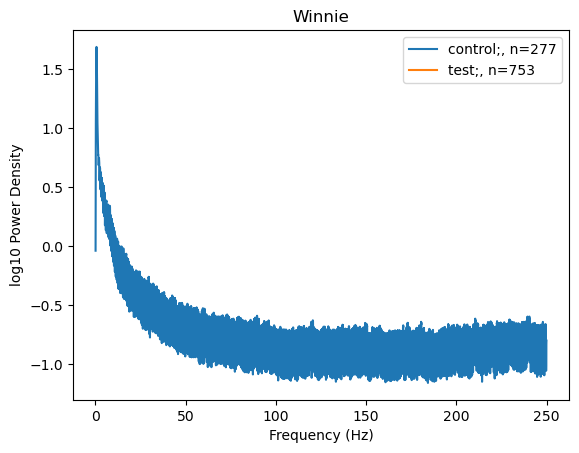

In [166]:
for name, result in spectrum_results.items():
    # power = np.average(
    #     (result["spectrums"]),
    #     axis=0,
    # )  # weights=result["weights"])
    # plt.plot(f, np.log10(power), label=name)

    weights = np.array(result["weights"])
    power = result["spectrums"] * f
    power = np.log10(power)
    ind = ~np.isnan(power).any(axis=1)
    power = power[ind]

    mid = np.average(power, axis=0, weights=weights[ind])
    mid = np.average(
        power,
        axis=0,
    )  # weights=weights)

    # mid = np.array(
    #     [weighted_quantile(power[:, ii], 0.5, weights) for ii in range(power.shape[1])]
    # )
    # low = np.array(
    #     [weighted_quantile(power[:, ii], 0.25, weights) for ii in range(power.shape[1])]
    # )
    # high = np.array(
    #     [weighted_quantile(power[:, ii], 0.75, weights) for ii in range(power.shape[1])]
    # )
    plt.plot(f, mid, label=f"{name};, n={len(result['spectrums'])}")
    # plt.fill_between(f, low, high, alpha=0.5)


# plt.xlim(3, 20)
plt.legend()
plt.title(animal)
plt.xlabel("Frequency (Hz)")
plt.ylabel("log10 Power Density")
# plt.xlim(3, 15)

# plt.ylim(-10,10)

# DEV

In [124]:
window_size = 2
from Analysis.utils import weighted_quantile

for interval_list in [outbound_intervals, inbound_intervals]:
    spectrums = []
    weights = []

    for interval in interval_list:
        rng = np.digitize(interval, results.time)
        if rng[1] - rng[0] < window_size:
            continue
        f, power, weight = power_spectrum(
            data=ahead_behind[rng[0] : rng[1]],
            window_size=window_size,
            sampling_rate=500,
        )
        spectrums.append(power)
        weights.append(weight)
    spectrums = np.array(spectrums)  # * f**1
    weights = np.array(weights)

    power = spectrums * f
    power = np.log10(power)
    # power = np.average(power, axis=0, weights=weights)

    mid = np.array(
        [weighted_quantile(power[:, ii], 0.5, weights) for ii in range(power.shape[1])]
    )
    low = np.array(
        [weighted_quantile(power[:, ii], 0.25, weights) for ii in range(power.shape[1])]
    )
    high = np.array(
        [weighted_quantile(power[:, ii], 0.75, weights) for ii in range(power.shape[1])]
    )

    plt.plot(f, mid)
    # plt.fill_between(f, low, high, alpha=0.5)

    # plt.plot(f, power)
    plt.xlim(0.5, 30)
    # plt.ylim(2, 3)

ValueError: operands could not be broadcast together with shapes (0,) (5001,) 

In [220]:
k = "waveform_features_group_name LIKE '%wtrack%'"
pop_keys = ((ClusterlessDecodingV1() & k) - ClusterlessAheadBehindDistance()).fetch(
    "KEY"
)

len(pop_keys)

44

In [224]:
ClusterlessAheadBehindDistance().populate(pop_keys[0])

[2024-08-14 12:37:16,328][WARNING]: Skipped checksum for file with hash: c0b1d9b5-af00-19fd-2082-dd1c6cf5af11, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_5bf6681d-301a-401a-abc3-e1082d23cfc9.nc


TypeError: 'DataArray' object is not callable

In [234]:
time_slice = slice(0, 1000)
(
    (ClusterlessDecodingV1 & pop_keys[0])
    .fetch_results()
    .acausal_posterior[time_slice]
    .squeeze()
    .unstack("state_bins")
    .sum("state")
)

[2024-08-14 12:40:39,519][WARNING]: Skipped checksum for file with hash: c0b1d9b5-af00-19fd-2082-dd1c6cf5af11, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_5bf6681d-301a-401a-abc3-e1082d23cfc9.nc


<xarray.DataArray 'acausal_posterior' (time: 597879, position: 224)>
array([[0.00454515, 0.00454515, 0.00454515, ..., 0.00454533, 0.00454533,
        0.00454533],
       [0.00422259, 0.00466854, 0.00467999, ..., 0.00467971, 0.00466931,
        0.00422342],
       [0.00411317, 0.00463676, 0.00472522, ..., 0.00472517, 0.00463785,
        0.0041141 ],
       ...,
       [0.00388988, 0.00443042, 0.00462171, ..., 0.00462215, 0.00443166,
        0.00389073],
       [0.00388988, 0.00443042, 0.00462171, ..., 0.00462215, 0.00443166,
        0.00389073],
       [0.00388988, 0.00443042, 0.00462171, ..., 0.00462215, 0.00443166,
        0.00389073]], dtype=float32)
Coordinates:
  * position  (position) float64 0.9854 2.956 4.927 6.898 ... 486.8 488.8 490.8
  * time      (time) float64 1.691e+09 1.691e+09 ... 1.691e+09 1.691e+09

In [243]:
time_slice = slice(0, 1000)

r = (ClusterlessDecodingV1 & pop_keys[0]).fetch_results()
r.acausal_posterior[time_slice]

[2024-08-14 12:43:26,340][WARNING]: Skipped checksum for file with hash: c0b1d9b5-af00-19fd-2082-dd1c6cf5af11, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_5bf6681d-301a-401a-abc3-e1082d23cfc9.nc


<xarray.DataArray 'acausal_posterior' (intervals: 1, time: 597879,
                                       state_bins: 448)>
[267849792 values with dtype=float32]
Coordinates:
  * time        (time) float64 1.691e+09 1.691e+09 ... 1.691e+09 1.691e+09
  * state_bins  (state_bins) object MultiIndex
  * state       (state_bins) object 'Continuous' 'Continuous' ... 'Fragmented'
  * position    (state_bins) float64 0.9854 2.956 4.927 ... 486.8 488.8 490.8
Dimensions without coordinates: intervals

In [50]:
(ClusterlessDecodingV1 & pop_keys[0]).fetch_model()

ClusterlessDetector(clusterless_algorithm='clusterless_kde',
                    clusterless_algorithm_params={'block_size': 10000,
                                                  'position_std': 6.0,
                                                  'waveform_std': 24.0},
                    continuous_initial_conditions_types=[UniformInitialConditions(),
                                                         UniformInitialConditions()],
                    continuous_transition_types=[[RandomWalk(environment_name='', movement_var=6.0, movement_mean=0.0, use_manifold_...
                    environments=[Environment(environment_name='', place_bin_size=2.0, track_graph=<networkx.classes.graph.Graph object at 0x7f6ca2e22bb0>, edge_order=[(0, 1), (1, 2), (2, 3), (1, 4), (4, 5)], edge_spacing=15, is_track_interior=None, position_range=None, infer_track_interior=True, fill_holes=False, dilate=False, bin_count_threshold=0)],
                    infer_track_interior=True, no_spike_rate=1e-10,
                    observation_models=[ObservationModel(environment_name='', encoding_group=0, is_local=False, is_no_spike=False),
                                        ObservationModel(environment_name='', encoding_group=0, is_local=False, is_no_spike=False)],
                    sampling_frequency=500.0,
                    state_names=['Continuous', 'Fragmented'])

In [64]:
# ClusterlessAheadBehindDistance()
pop_keys = (
    (ClusterlessDecodingV1() & "position_group_name LIKE 'DLC%'")
    - ClusterlessAheadBehindDistance()
).fetch("KEY")

import jax

ClusterlessAheadBehindDistance().populate(pop_keys, processes=1)

[2024-08-21 10:10:27,409][WARNING]: Skipped checksum for file with hash: 508f8654-811d-aacf-ae73-50f995ec96f5, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_0734f4a3-1e96-45b9-8f77-a11cbd64456f.nc


TypeError: unhashable type: 'numpy.ndarray'

In [66]:
%debug

> /home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/networkx/classes/reportviews.py(194)__getitem__()
    192                 f"try list(G.nodes)[{n.start}:{n.stop}:{n.step}]"
    193             )
--> 194         return self._nodes[n]
    195 
    196     # Set methods

[0 1]
> /home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/non_local_detector/analysis/distance1D.py(94)_get_distance_between_nodes()
     92 
     93 def _get_distance_between_nodes(track_graph, node1, node2):
---> 94     node1_pos = np.asarray(track_graph.nodes[node1]["pos"])
     95     node2_pos = np.asarray(track_graph.nodes[node2]["pos"])
     96     return np.sqrt(np.sum((node1_pos - node2_pos) ** 2))

array([0, 1])
'mental_position'
'mental_position'
*** NameError: name 'metal_edge' is not defined
*** NameError: name 'mental_edge' is not defined
> /home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/non_local_detector/analysis/distance1D.py(155)_s

In [63]:
(ClusterlessDecodingV1 & pop_keys[0]).fetch_model().environments[0].track_graph.nodes[
    0
]["pos"]

(91.0, 14.0)

In [97]:
from spyglass.decoding.v1.clusterless import ClusterlessDecodingSelection

pop_keys = (
    ClusterlessDecodingSelection() & "position_group_name LIKE 'DLC%'"
) - ClusterlessDecodingV1()
print(len(pop_keys))
ClusterlessDecodingV1() & pop_keys

# ClusterlessDecodingV1().populate(pop_keys,processes=1)
# Clusterl

4


nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters,results_path path to the results file,classifier_path path to the classifier file


In [98]:
ClusterlessAheadBehindDistance & pop_keys
ClusterlessDecodingV1 & pop_keys
pop_keys

nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters
Wallie20220922_.nwb,02_wtrack,DLC pos 1 valid times,ms_wtrack_contfrag_clusterless_causal,pos 1 valid times,pos 1 valid times,0
Wallie20220922_.nwb,02_wtrack,DLC pos 1 valid times,ms_wtrack_contfrag_clusterless_causal,pos 1 valid times_opto_control_interval,pos 1 valid times,0
Wallie20220922_.nwb,02_wtrack,DLC pos 1 valid times,ms_wtrack_contfrag_clusterless_causal,pos 1 valid times_opto_test_interval,pos 1 valid times,0
Wallie20220922_.nwb,02_wtrack,DLC pos 1 valid times,ms_wtrack_contfrag_clusterless_causal,pos 1 valid times_stimulus_on_interval,pos 1 valid times,0


In [101]:
table = (
    ClusterlessDecodingV1 & "position_group_name LIKE 'DLC%'"
) - ClusterlessAheadBehindDistance()
pop_key = table.fetch("KEY")[0]
ClusterlessAheadBehindDistance().populate(pop_key)

[2024-08-21 11:24:29,432][WARNING]: Skipped checksum for file with hash: 8229df80-a4fd-883d-0341-1f9542cb6c22, and path: /stelmo/nwb/analysis/Frodo20230815/Frodo20230815_a1e6dccc-450f-4e4b-badf-7e3cbb17ef1c.nc
[2024-08-21 11:25:53,564][WARNING]: Skipped checksum for file with hash: 8229df80-a4fd-883d-0341-1f9542cb6c22, and path: /stelmo/nwb/analysis/Frodo20230815/Frodo20230815_a1e6dccc-450f-4e4b-badf-7e3cbb17ef1c.nc
[11:25:54][INFO] Spyglass: Writing new NWB file Frodo20230815_5A5F46R0VH.nwb


# Methodical Check for Decoding

In [11]:
# make list of keys you expect but aren't there
animal_list = animal_style.index
animal_list = [x for x in animal_list if x != "Banner"]

missing_clusterless = []
for animal in animal_list:
    dataset_key = {"animal": animal, "track_type": "lineartrack", "targeted_phase": 90}

    # get the keys for the data we're analyzing
    dataset = filter_opto_data(dataset_key)
    key_pairs = []
    for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):

        trial_keys = (
            TrialIntervals()
            * (TaskEpoch * (PositionIntervalMap() & key)).proj(
                waveform_features_group_name="interval_list_name"
            )
        ).fetch("nwb_file_name", "epoch", "waveform_features_group_name", as_dict=True)

        trial_keys
        if not (
            query := (
                ClusterlessDecodingV1()
                & "position_group_name LIKE 'DLC%'"
                & "encoding_interval LIKE '%valid times'"
                & trial_keys
            )
        ):
            print("No clusterless decoding", key)
            missing_clusterless.append(key)
            continue

datasets: 4
No clusterless decoding {'nwb_file_name': 'Winnie20220717_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220717_.nwb', 'position_interval_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220718_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220718_.nwb', 'position_interval_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
datasets: 2
No clusterless decoding {'nwb_file_name': 'Frodo20230810_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
No clusterless decoding

In [12]:
from spyglass.decoding.v1.clusterless import (
    ClusterlessDecodingSelection,
    UnitWaveformFeaturesGroup,
)
from spyglass.common import TaskEpoch, PositionIntervalMap, interval_list_intersect
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput
from spyglass.decoding.v1.clusterless import UnitWaveformFeatures
from spyglass.decoding.v1.core import PositionGroup
import spyglass.spikesorting.v0 as sgs
import spyglass.position.v1 as sgp
import pandas as pd

all_results = []
for key in missing_clusterless:
    results = {
        **key,
        "artifact": False,
        "spikesorting": False,
        "UnitWaveformFeatures": False,
        "UnitGroup": False,
        "PositionGroup": False,
        "DLCPosV1": False,
        "ClusterlessDecodingSelection": False,
        "ClusterlessDecode": False,
    }
    if "Banner" in key["nwb_file_name"]:
        continue

    sort_interval = ((PositionIntervalMap() * TaskEpoch()) & key).fetch1(
        "interval_list_name"
    )
    sort_key = {
        "nwb_file_name": key["nwb_file_name"],
        "sort_interval_name": sort_interval,
        "sorter": "clusterless_thresholder",
    }
    if sgp.DLCPosV1 & (TaskEpoch * PositionIntervalMap() & key):
        results["DLCPosV1"] = True

    if not (sgs.ArtifactDetection() & sort_key):
        all_results.append(results)
        # continue
    results["artifact"] = True

    merge_keys = (
        (SpikeSortingOutput().CuratedSpikeSorting() & sort_key)
        .proj(spikesorting_merge_id="merge_id")
        .fetch("KEY")
    )
    if merge_keys:
        # all_results.append(results)
        # continue
        results["spikesorting"] = True

    if UnitWaveformFeatures() & merge_keys:
        # all_results.append(results)
        # continue
        results["UnitWaveformFeatures"] = True

    decode_key = {
        "nwb_file_name": key["nwb_file_name"],
        "position_group_name": "DLC " + key["position_interval_name"],
    }
    if UnitWaveformFeaturesGroup() & decode_key:
        results["UnitGroup"] = True
    if PositionGroup() & decode_key:
        results["PositionGroup"] = True

    if ClusterlessDecodingSelection() & decode_key:
        # all_results.append(results)
        # continue
        results["ClusterlessDecodingSelection"] = True

    if ClusterlessDecodingV1() & decode_key:
        results["ClusterlessDecode"] = True
        continue
    all_results.append(results)
    # break
all_results = pd.DataFrame(all_results)
all_results

,nwb_file_name,position_interval_name,dio_event_name,opto_infer_params_name,artifact,spikesorting,UnitWaveformFeatures,UnitGroup,PositionGroup,DLCPosV1,ClusterlessDecodingSelection,ClusterlessDecode
0,Winnie20220717_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
1,Winnie20220717_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
2,Winnie20220718_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
3,Winnie20220718_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
4,Frodo20230810_.nwb,pos 11 valid times,stim,default_pulse_train,True,True,True,True,False,False,False,False
5,Frodo20230811_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
6,Totoro20220607_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
7,Totoro20220607_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
8,Totoro20220610_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
9,Totoro20220610_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False


In [10]:
all_results

,nwb_file_name,position_interval_name,dio_event_name,opto_infer_params_name,artifact,spikesorting,UnitWaveformFeatures,UnitGroup,PositionGroup,DLCPosV1,ClusterlessDecodingSelection,ClusterlessDecode
0,Winnie20220712_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
1,Winnie20220712_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
2,Winnie20220712_.nwb,pos 3 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
3,Winnie20220712_.nwb,pos 3 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
4,Winnie20220713_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
438,Bilbo20230725_.nwb,pos 9 valid times,stim,default_pulse_train,True,False,False,True,False,False,False,False
439,Bilbo20230726_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
440,Bilbo20230726_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
441,Bilbo20230726_.nwb,pos 3 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False


In [8]:
(PositionIntervalMap() * TaskEpoch) & key

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,epoch the session epoch for this task and apparatus(1 based),position_interval_name name of the corresponding interval,task_name,camera_name,task_environment the environment the animal was in,camera_names list of keys corresponding to entry in CameraDevice
Winnie20220714_.nwb,12_lineartrack,12,pos 11 valid times,lineartrack,None,none,=BLOB=


In [20]:
all_results
# sgs.ArtifactDetection() & sort_key

,nwb_file_name,position_interval_name,dio_event_name,opto_infer_params_name,artifact,spikesorting,UnitWaveformFeatures,UnitGroup,PositionGroup,ClusterlessDecodingSelection,ClusterlessDecode
0,Winnie20220720_.nwb,pos 1 valid times,stim,default_phase_targeting,False,False,False,False,False,False,False
1,Winnie20220720_.nwb,pos 11 valid times,stim,default_phase_targeting,False,False,False,False,False,False,False
2,Winnie20220722_.nwb,pos 1 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
3,Winnie20220722_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
4,Frodo20230814_.nwb,pos 1 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
5,Frodo20230814_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
6,Frodo20230814_.nwb,pos 15 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
7,Frodo20230814_.nwb,pos 17 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
8,Frodo20230814_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
9,Frodo20230814_.nwb,pos 5 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False


In [13]:
sgs.SpikeSortingRecording().full_table_name

'`spikesorting_recording`.`__spike_sorting_recording`'

In [31]:
sort_key = {
    "nwb_file_name": key["nwb_file_name"],
    "sort_interval_name": sort_interval,
    "sorter": "clusterless_thresholder",
}
merge_keys = (
    (SpikeSortingOutput().CuratedSpikeSorting() & sort_key)
    .proj(spikesorting_merge_id="merge_id")
    .fetch("KEY")
)

UnitWaveformFeatures() & merge_keys

spikesorting_merge_id,features_param_name a name for this set of parameters,analysis_file_name name of the file,object_id the NWB object that stores the waveforms
1db31007-9bf9-4780-5668-fa661badbaa3,amplitude,Winnie20220719_U5EERHJ56F.nwb,6b3b832c-0439-43d3-b212-85e423a03d2e
2277ad5b-06b7-7489-9cff-da64a45ef979,amplitude,Winnie20220719_5YDD40KYWB.nwb,f26ca6e5-e25a-4e2d-a86e-d4ac75f07d7e
403b0663-af48-aecc-e9af-e1bfa5262c2c,amplitude,Winnie20220719_CXTI7QNZO5.nwb,040a5a06-367c-44db-a7b4-9fc5ce7699c5
4647b9e7-7d01-2bb0-d6a7-e78df37f3b4a,amplitude,Winnie20220719_VNMCMOJRPI.nwb,b3a7b80f-dcde-485c-96a2-3df468af2dad
46960539-3cb6-6ac2-deec-d5863495bce5,amplitude,Winnie20220719_X5H4HGA4P6.nwb,3151af8e-da66-4e76-9ca6-945d958348c1
4cb94d10-1f9a-2021-34e2-53deedd1b3f0,amplitude,Winnie20220719_HWU8155ELK.nwb,400e82e1-564e-425d-9a36-ccca4443ade2
66a48010-ef5d-6ff7-91a2-c6a1fc1ede92,amplitude,Winnie20220719_ITD8IR2XHV.nwb,1912c33f-66b2-4140-87dc-356551c0d611
6da24820-202f-12f9-a9ea-a002acf79e9b,amplitude,Winnie20220719_2E2UXX51JI.nwb,4d5489f2-bc73-4509-88c5-d3020f14a6fc
7c3cf1ff-31c0-5517-7ec7-4010d6936b38,amplitude,Winnie20220719_5QSN8TUY03.nwb,ad2895f4-f3af-4447-a16d-409a579f5e46
81fbf48b-895b-41b1-df1d-a27101ed690f,amplitude,Winnie20220719_524RNGDCUW.nwb,a0596e36-5a9a-4bd1-9f7b-e27f93233249
